# **LEITURA E TRATAMENTO DA BASE DE DADOS**

### **Importação das bibliotecas necessárias, leitura da base de dados e informações gerais dos dados**

In [ ]:
# Importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de estilo
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 10})
# ------------------------------
# Carregamento da base de dados
# ------------------------------

caminho_arquivo = "dados/base_anos_iniciais.xlsx"


df = pd.read_excel(caminho_arquivo)

# ------------------------------
# Informações Gerais da Base
# ------------------------------
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
print("\nColunas com valores ausentes:")
print(df.isnull().sum()[df.isnull().sum() > 0])
print("\nTipos de dados por coluna:")
print(df.dtypes)




Número de linhas: 1344
Número de colunas: 128

Colunas com valores ausentes:
Taxa de Aprovação                                                                              12
Indicador de Rendimento (P)                                                                    12
Nota SAEB em Matemática                                                                       294
Nota SAEB em Língua Portuguesa                                                                294
Nota SAEB - Nota Média Padronizada (N)                                                         82
IDEB                                                                                           82
Área colhida -lavour                                                                            2
Valor da produção -lavour                                                                       2
Valor Repassado a PCDs pelo RMV                                                                18
Valor Repassado a Idosos pelo RMV        

### **Tratamento dos dados faltantes**

**Exclusão das colunas que não serão utilizadas no modelo**

In [3]:
# ------------------------------
# Exclusão das colunas que não serão utilizadas no modelo
# ------------------------------
colunas_remover = ["Nota SAEB em Matemática", "Nota SAEB em Língua Portuguesa"]
df.drop(columns=colunas_remover, inplace=True)

**Exclusão de linhas com IDEB e "Nota SAEB - Nota Média Padronizada (N)"ausentes**

In [4]:
# ------------------------------
# Exclusão de linhas com IDEB ausente
# ------------------------------

# Número de linhas antes da filtragem
linhas_antes = df.shape[0]

# Filtragem: mantém apenas registros com IDEB não nulo
df = df[df[["IDEB", "Nota SAEB - Nota Média Padronizada (N)"]].notnull().all(axis=1)].copy()

# Número de linhas após a filtragem
linhas_depois = df.shape[0]

# Exibir resultado
print(f"Número de linhas antes da remoção: {linhas_antes}")
print(f"Número de linhas após a remoção dos IDEBs ausentes: {linhas_depois}")
print(f"Total de registros removidos: {linhas_antes - linhas_depois}")

Número de linhas antes da remoção: 1344
Número de linhas após a remoção dos IDEBs ausentes: 1262
Total de registros removidos: 82


**Informações Gerais da Base após remoção dos IDEBs faltantes**

In [5]:
# ------------------------------
# Informações Gerais da Base após remoção dos IDEBs faltantes
# ------------------------------
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# Tabela com colunas que possuem valores ausentes
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

# Cálculo do percentual de valores ausentes
percentuais = (faltantes / df.shape[0] * 100).round(2)

# Montagem da tabela
tabela_nulos = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Percentual (%)': percentuais
})

# Exibição formatada
print("\nColunas com valores ausentes (ordenadas):")
display(tabela_nulos)

# Tipos de dados
print("\nTipos de dados por coluna:")
print(df.dtypes)


Número de linhas: 1262
Número de colunas: 126

Colunas com valores ausentes (ordenadas):


,Valores Faltantes,Percentual (%)
Valor Total repassado ao BPC,21,1.66
Total de Beneficiários do BPC,21,1.66
Valor Repassado a PCDs pelo RMV,13,1.03
Valor Repassado a PCDs pelo BPC,13,1.03
Idosos beneficiários do BPC,13,1.03
Valor Repassado a Idosos pelo RMV,13,1.03
Pessoas com Deficiência beneficiárias do BPC,13,1.03
Valor Repassado a Idosos pelo BPC,13,1.03
receitas destinadas ao fundeb (fundo estadual),3,0.24
Valor da produção -lavour,2,0.16



Tipos de dados por coluna:
Ano                                                      int64
Código do Município                                      int64
Nome do Município                                       object
QT_ESCOLAS                                               int64
Quantidade de Matrículas                                 int64
                                                        ...   
pré-escola                                             float64
ensino fundamental                                     float64
ensino médio                                           float64
ensino profissional não integrado ao ensino regular    float64
quota do salário-educação                              float64
Length: 126, dtype: object


**Tratando as demais variáveis com dados faltantes**

In [6]:
# ------------------------------
# Imputação dos valores ausentes por mediana
# ------------------------------

variaveis_para_imputar = [
    # Variáveis originalmente incluídas
    "Valor Total repassado ao BPC",
    "Total de Beneficiários do BPC",
    "Idosos beneficiários do BPC",
    "Pessoas com Deficiência beneficiárias do BPC",
    "Valor Repassado a PCDs pelo RMV",
    "Valor Repassado a Idosos pelo RMV",
    "Valor Repassado a Idosos pelo BPC",
    "Valor Repassado a PCDs pelo BPC",
    "Valor da produção -lavour",
    "Área colhida -lavour",

    # Novas variáveis adicionadas (financeiras e educacionais)
    "iptu", "itbi", "irrf", "iss",
    "cota parte icms", "cota parte ipi-exp", "cota-parte ipva", "fpm",
    "salário-educação", "pdde", "pnae", "pnate",
    "convênios", "operação de créditos",
    "contribuição na formação do fundef/fundeb – destinada",
    "cota-parte iof-ouro",
    "receita recebida na redistribuição interna do fundeb (transferência de recursos do fundeb)",
    "resultado líquido (ganhos ou perdas = recebido - enviado)",
    "receita da aplicação financeira do fundeb", "complementação da união", "vaaf",
    "total_composiçâo_complementaçâo_fundeb",
    "receitas recebidas do fundeb (fundo estadual)",
    "receitas destinadas ao fundeb (fundo estadual)",
    "valor aplicado em mde",
    "educação infantil", "creche", "pré-escola",
    "ensino fundamental", "ensino profissional não integrado ao ensino regular",
    "ensino médio", "quota do salário-educação",
    "despesas com profissionais da educação básica"
]


# Aplicar imputação com a mediana
for var in variaveis_para_imputar:
    mediana = df[var].median()
    df[var] = df[var].fillna(mediana)

print("✅ Imputação concluída com sucesso para as variáveis com dados faltantes.")

✅ Imputação concluída com sucesso para as variáveis com dados faltantes.


**Informações Gerais da Base após o remoção (IDEB) e tratamento (demais variáveis) de todos os dados faltantes**

In [7]:
# ------------------------------
# Informações Gerais da Base após remoção dos IDEBs faltantes
# ------------------------------
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")

# Tabela com colunas que possuem valores ausentes
faltantes = df.isnull().sum()
faltantes = faltantes[faltantes > 0].sort_values(ascending=False)

# Cálculo do percentual de valores ausentes
percentuais = (faltantes / df.shape[0] * 100).round(2)

# Montagem da tabela
tabela_nulos = pd.DataFrame({
    'Valores Faltantes': faltantes,
    'Percentual (%)': percentuais
})

# Exibição formatada
print("\nColunas com valores ausentes (ordenadas):")
display(tabela_nulos)

Número de linhas: 1262
Número de colunas: 126

Colunas com valores ausentes (ordenadas):


,Valores Faltantes,Percentual (%)


# **ESCOLHENDO VARIÁVEIS - VIF, LassoCV, SHAP e Boruta**

### **Variáveis que serão excluídas**

In [8]:
import numpy as np
# Exclusão de variáveis que não devem entrar no modelo
variaveis_excluir = [
    "Nome do Município", "Código do Município", "Município", "Ano",
    "Nota SAEB - Nota Média Padronizada (N)",
    "Nota SAEB em Matemática",
    "Nota SAEB em Língua Portuguesa",
    "Indicador de Rendimento (P)",
    "Taxa de Aprovação"
]


df = df.drop(columns=[v for v in variaveis_excluir if v in df.columns], errors='ignore')

# Selecionar apenas variáveis numéricas
df = df.select_dtypes(include=[np.number])


**Instalando o Boruta**

In [9]:
pip install boruta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.3 MB/s eta 0:00:00


**Pipeline completo de seleção de variáveis**

❌ Removendo 'VAB bruto total' com VIF=inf
❌ Removendo 'VAB Indústria' com VIF=inf
❌ Removendo 'Grupo 1-adeq form docente' com VIF=inf
❌ Removendo 'Baixa regularidade' com VIF=inf
❌ Removendo 'Nível 1-esforço docente' com VIF=inf
❌ Removendo 'Valor repassado-Gestão-SUAS' com VIF=inf
❌ Removendo 'Valor total repassado via Fundo Municipal' com VIF=inf
❌ Removendo 'salário-educação' com VIF=inf
❌ Removendo 'receita recebida na redistribuição interna do fundeb (transferência de recursos do fundeb)' com VIF=inf
❌ Removendo 'complementação da união' com VIF=inf
❌ Removendo 'Valor Total repassado ao BPC' com VIF=1585350826.09
❌ Removendo 'receitas recebidas do fundeb (fundo estadual)' com VIF=742905296.29
❌ Removendo 'Total de Beneficiários do BPC' com VIF=319537.20
❌ Removendo 'contribuição na formação do fundef/fundeb – destinada' com VIF=41146.06
❌ Removendo 'Valor total repassado via Fundos Municipal e Estadual' com VIF=29115.70
❌ Removendo 'receitas destinadas ao fundeb (fundo estadual)' 

 98%|===================| 1239/1262 [00:50<00:00]       

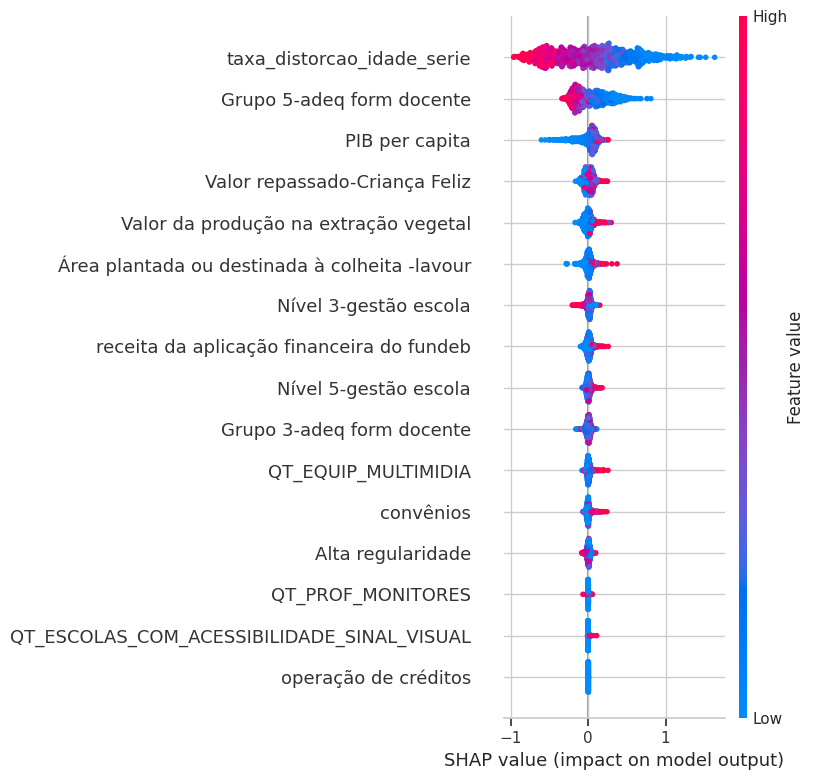


✅ Variáveis selecionadas via SHAP (threshold=0.01):
['QT_EQUIP_MULTIMIDIA', 'PIB per capita', 'taxa_distorcao_idade_serie', 'Grupo 3-adeq form docente', 'Grupo 5-adeq form docente', 'Área plantada ou destinada à colheita -lavour', 'Valor da produção na extração vegetal', 'Alta regularidade', 'Nível 3-gestão escola', 'Nível 5-gestão escola', 'Valor repassado-Criança Feliz', 'convênios', 'receita da aplicação financeira do fundeb']

✅ Variáveis selecionadas via Boruta:
['PIB per capita', 'taxa_distorcao_idade_serie', 'Grupo 5-adeq form docente', 'Área plantada ou destinada à colheita -lavour', 'Valor da produção na extração vegetal', 'Valor repassado-Criança Feliz']

✅✅✅ Variáveis finais selecionadas após todas as técnicas:
 ['PIB per capita', 'taxa_distorcao_idade_serie', 'Grupo 5-adeq form docente', 'Área plantada ou destinada à colheita -lavour', 'Valor da produção na extração vegetal', 'Valor repassado-Criança Feliz']


In [28]:
# ======================================================
# IMPORTAÇÃO DE BIBLIOTECAS
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor
import shap
from boruta import BorutaPy

# ✅ FUNÇÃO 1: Stepwise VIF
def stepwise_vif(X, thresh=10.0):
    variables = X.columns.tolist()
    dropped = True
    while dropped:
        dropped = False
        vif = pd.Series(
            [variance_inflation_factor(X[variables].values, i) for i in range(len(variables))],
            index=variables
        )
        max_vif = vif.max()
        if max_vif > thresh:
            drop_var = vif.idxmax()
            variables.remove(drop_var)
            dropped = True
            print(f"❌ Removendo '{drop_var}' com VIF={max_vif:.2f}")
    print("\n✅ Variáveis após Stepwise VIF:", variables)
    return variables

# FUNÇÃO 2: Lasso com validação cruzada
def lasso_cv_selection(X, y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X_scaled, y)

    coef = pd.Series(lasso.coef_, index=X.columns)
    selected_features = coef[coef != 0].index.tolist()

    print(f"\n✅ Variáveis selecionadas por LassoCV (alpha={lasso.alpha_:.4f}):\n{selected_features}")
    return selected_features

# FUNÇÃO 3: SHAP Values para explicabilidade
def shap_selection(X, y, model=None, threshold=0.01):
    if model is None:
        model = RandomForestRegressor(n_estimators=100, random_state=42)

    model.fit(X, y)
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    shap.summary_plot(shap_values, X)

    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    shap_importance = pd.Series(mean_abs_shap, index=X.columns)

    selected = shap_importance[shap_importance >= threshold].index.tolist()
    print(f"\n✅ Variáveis selecionadas via SHAP (threshold={threshold}):\n{selected}")
    return selected

# FUNÇÃO 4: Boruta para seleção robusta
def boruta_selection(X, y):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)

    boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
    boruta_selector.fit(X.values, y.values)

    selected = X.columns[boruta_selector.support_].tolist()
    print(f"\n✅ Variáveis selecionadas via Boruta:\n{selected}")
    return selected

# FUNÇÃO 5: Pipeline Completo de Seleção
def pipeline_selecao_variaveis(df, target='IDEB'):
    # Separar preditoras e alvo
    X = df.drop(columns=[target])
    y = df[target]

    # Imputação de valores ausentes
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

    # === STEP 1: VIF ===
    X_vif = X.copy()
    vif_vars = stepwise_vif(X_vif)
    X_vif = X_vif[vif_vars]

    # === STEP 2: LassoCV ===
    lasso_vars = lasso_cv_selection(X_vif, y)
    X_lasso = X_vif[lasso_vars]

    # === STEP 3: SHAP ===
    shap_vars = shap_selection(X_lasso, y, model=RandomForestRegressor())
    X_shap = X_lasso[shap_vars]

    # === STEP 4: Boruta ===
    boruta_vars = boruta_selection(X_shap, y)

    print("\n✅✅✅ Variáveis finais selecionadas após todas as técnicas:\n", boruta_vars)

    return X[boruta_vars], y



# Executar pipeline completo
X_final, y_final = pipeline_selecao_variaveis(df, target='IDEB')

# **MODELOS ML- (Modelos com apenas as melhores variáveis da por meio do pipeline das 4 técnicas de seleção de variávies) - Modelos que não precisam de normalização de dados**

### **Bibliotecas divisão da base de dados**

In [11]:
# ======================================================
# SCRIPT OTIMIZADO: AVALIAÇÃO DE MODELOS COM MELHORES VARIÁVEIS (GBM)
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Lista das melhores variáveis segundo seleção automática por Random Forest
melhores_variaveis = [
 'PIB per capita',
  'taxa_distorcao_idade_serie',
  'Grupo 5-adeq form docente',
  'Área plantada ou destinada à colheita -lavour',
  'Valor da produção na extração vegetal',
  'Valor repassado-Criança Feliz'
]


# ======================
# Pré-processamento
# ======================

# Supondo que o DataFrame df já está carregado

# Variável alvo
y = df["IDEB"]


X = df[melhores_variaveis].copy()

# Divisão treino/teste - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### **Funções com os modelos e avaliações**


🏁 Regressão Linear

🔍 Regressão Linear - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4968
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5037

📘 Regressão Linear - Validação Cruzada (5-fold)
R² Médio: 0.5227 ± 0.0351
MAE Médio: 0.5014 ± 0.0180
RMSE Médio: 0.6430 ± 0.0261


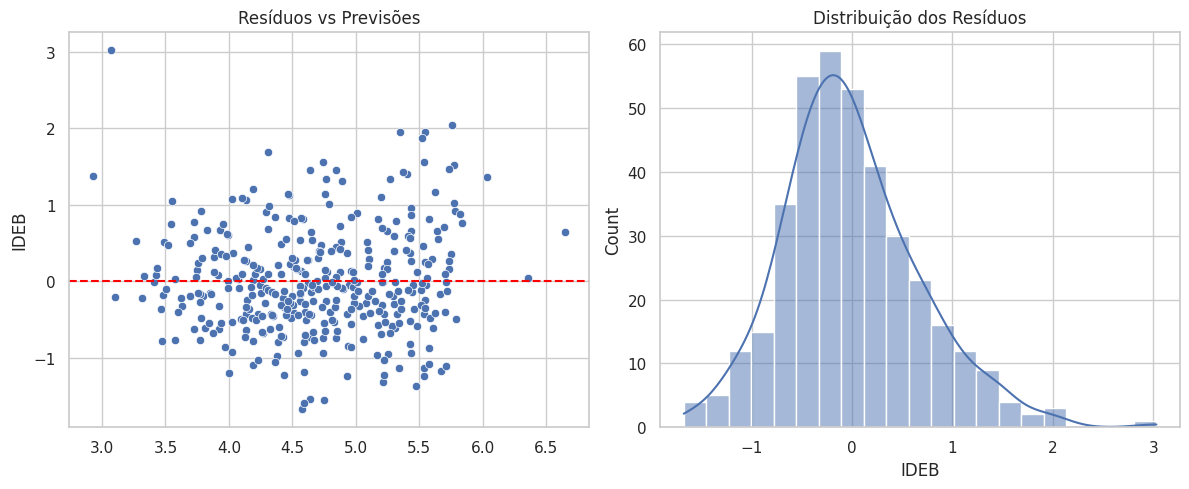


🔎 Pressupostos - Regressão Linear


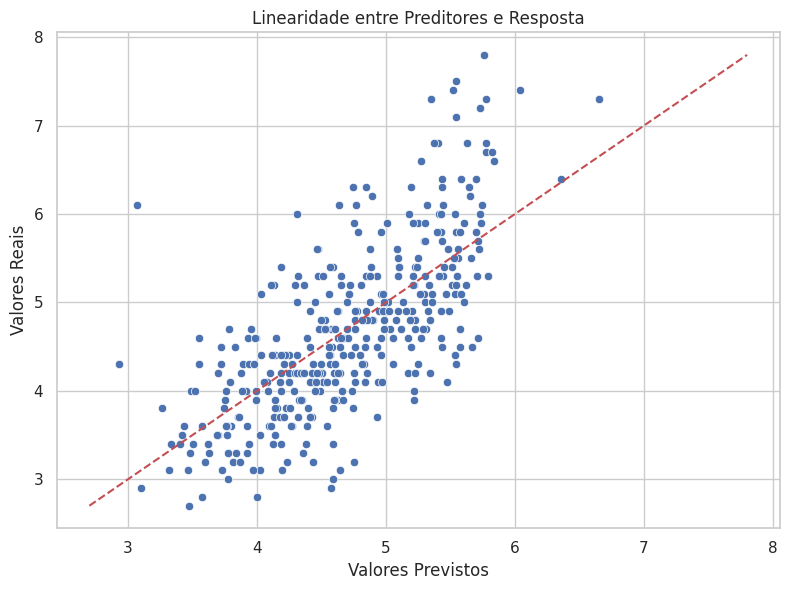

📏 Estatística de Durbin-Watson: 2.0480
✅ Os resíduos são provavelmente independentes.


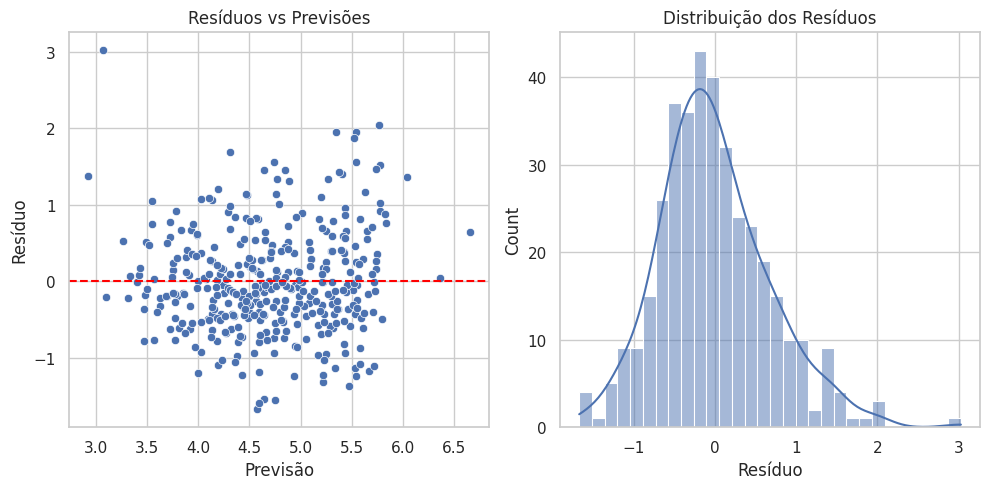

📊 Teste de Shapiro-Wilk: estatística=0.9782, p-valor=0.0000
⚠️ Os resíduos NÃO seguem uma distribuição normal.


,Variável,VIF
1,taxa_distorcao_idade_serie,3.560319
2,Grupo 5-adeq form docente,3.355076
0,PIB per capita,3.258260
3,Área plantada ou destinada à colheita -lavour,2.290470
5,Valor repassado-Criança Feliz,1.506312
4,Valor da produção na extração vegetal,1.357908


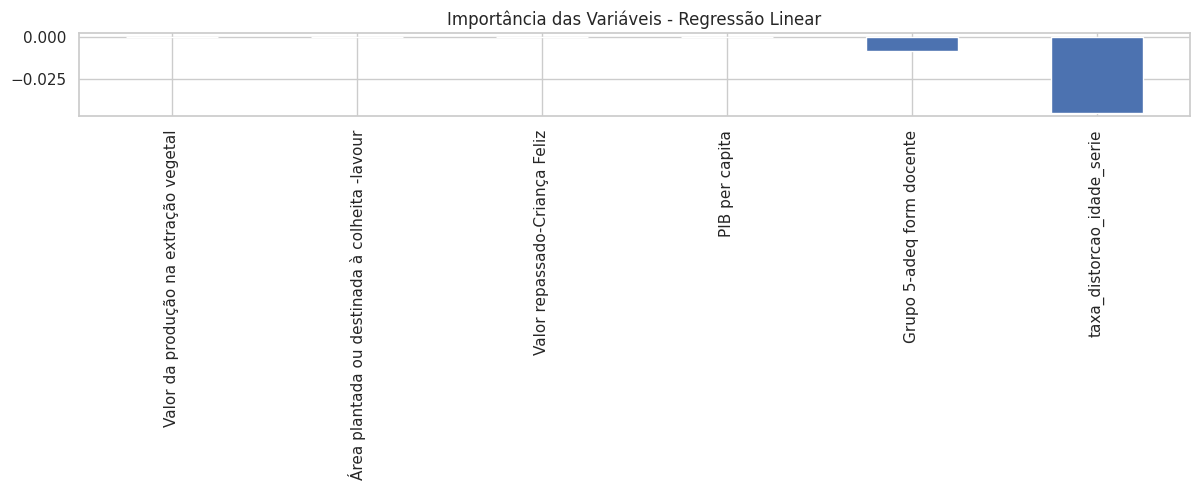


📊 Tabela de Importância das Variáveis - Regressão Linear:



,Variável,Importância
0,Valor da produção na extração vegetal,0.0000
1,Área plantada ou destinada à colheita -lavour,0.0000
2,Valor repassado-Criança Feliz,0.0000
3,PIB per capita,0.0000
4,Grupo 5-adeq form docente,-0.0085
5,taxa_distorcao_idade_serie,-0.0453



🏁 Random Forest

🔍 Random Forest - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5889
 - MAE: 0.4548
 - R² : 0.6012
📊 Teste:
 - RMSE: 0.6657
 - MAE: 0.5192
 - R² : 0.5222

📘 Random Forest - Validação Cruzada (5-fold)
R² Médio: 0.5311 ± 0.0292
MAE Médio: 0.4917 ± 0.0245
RMSE Médio: 0.6373 ± 0.0193


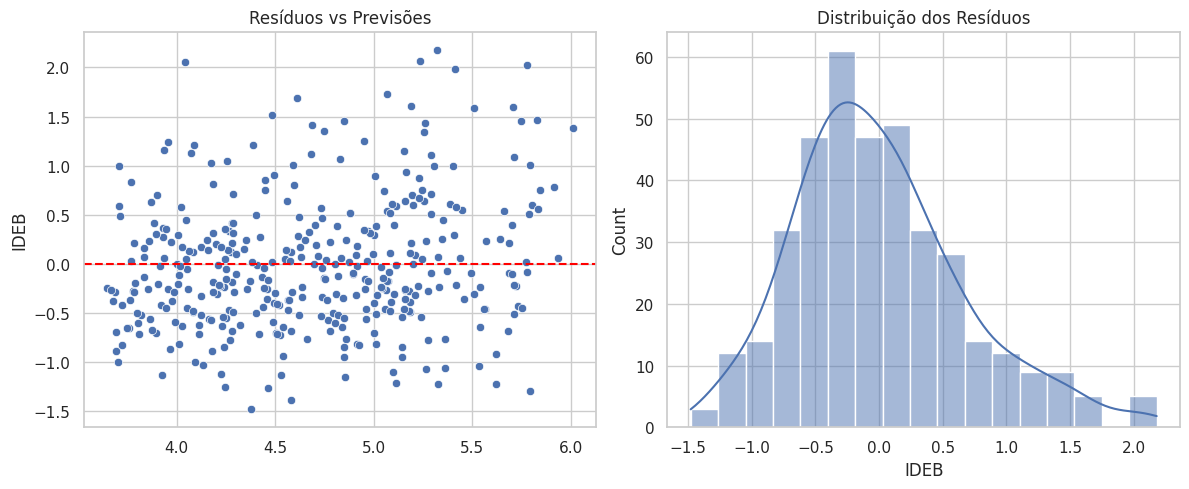

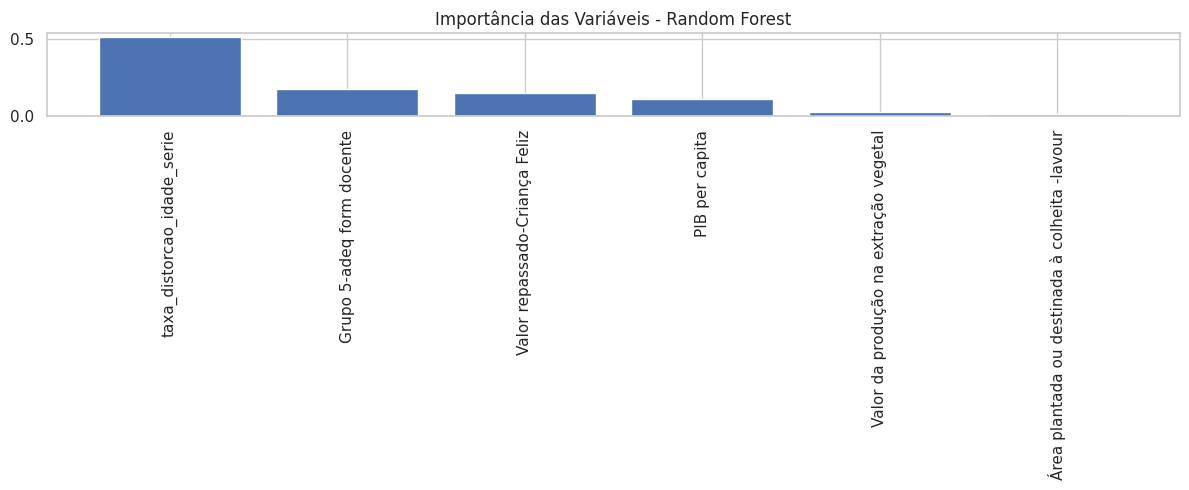


📊 Tabela de Importância das Variáveis - Random Forest:



,Variável,Importância
0,taxa_distorcao_idade_serie,0.5136
1,Grupo 5-adeq form docente,0.1777
2,Valor repassado-Criança Feliz,0.1488
3,PIB per capita,0.1138
4,Valor da produção na extração vegetal,0.0281
5,Área plantada ou destinada à colheita -lavour,0.0180



🏁 GBM

🔍 GBM - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5821
 - MAE: 0.4535
 - R² : 0.6102
📊 Teste:
 - RMSE: 0.6726
 - MAE: 0.5254
 - R² : 0.5123

📘 GBM - Validação Cruzada (5-fold)
R² Médio: 0.5270 ± 0.0256
MAE Médio: 0.4973 ± 0.0211
RMSE Médio: 0.6403 ± 0.0219


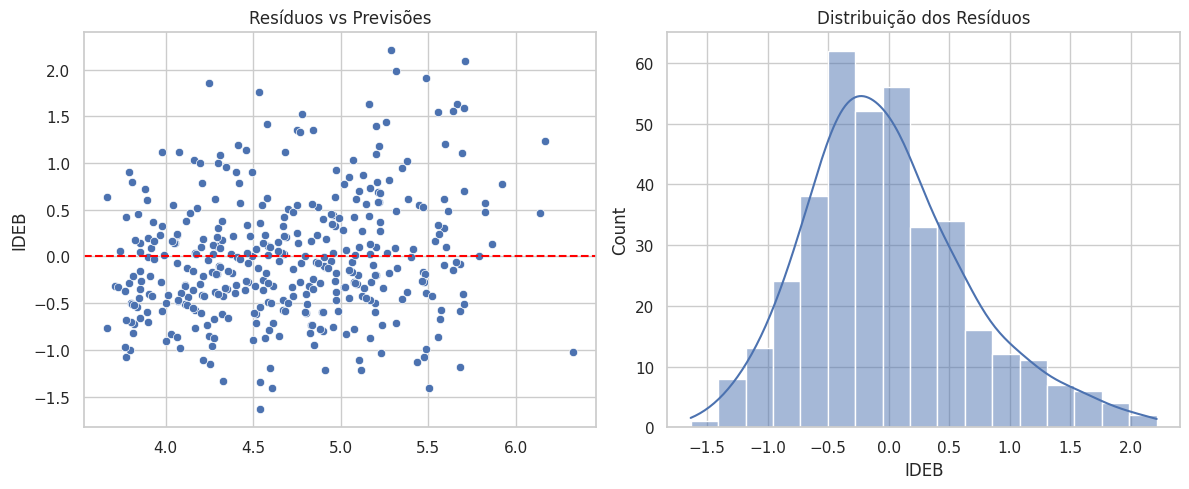

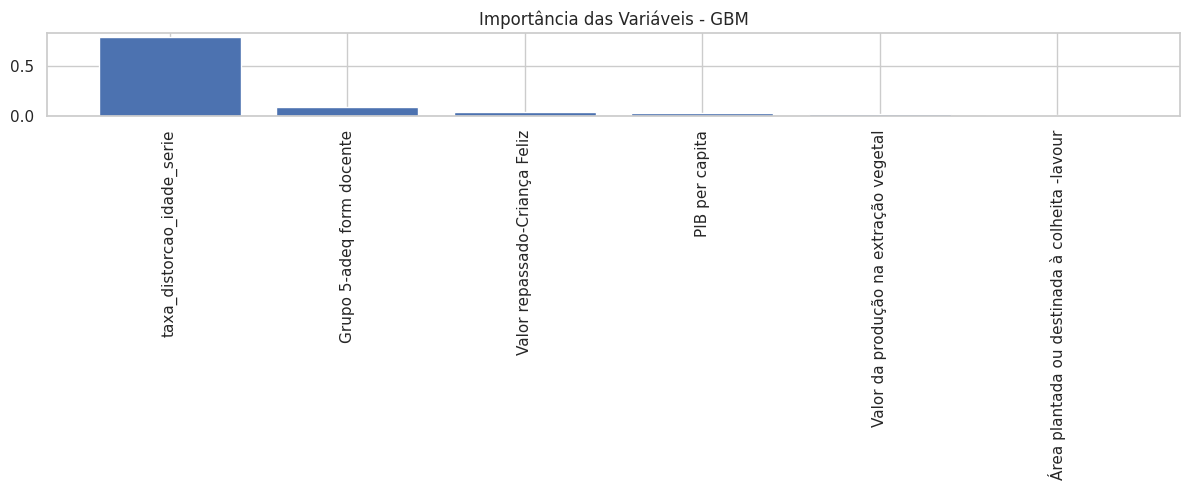


📊 Tabela de Importância das Variáveis - GBM:



,Variável,Importância
0,taxa_distorcao_idade_serie,0.7824
1,Grupo 5-adeq form docente,0.0928
2,Valor repassado-Criança Feliz,0.0477
3,PIB per capita,0.0333
4,Valor da produção na extração vegetal,0.0266
5,Área plantada ou destinada à colheita -lavour,0.0173



🏁 XGBoost

🔍 XGBoost - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5606
 - MAE: 0.4354
 - R² : 0.6385
📊 Teste:
 - RMSE: 0.6431
 - MAE: 0.5050
 - R² : 0.5542

📘 XGBoost - Validação Cruzada (5-fold)
R² Médio: 0.5455 ± 0.0293
MAE Médio: 0.4867 ± 0.0197
RMSE Médio: 0.6275 ± 0.0216


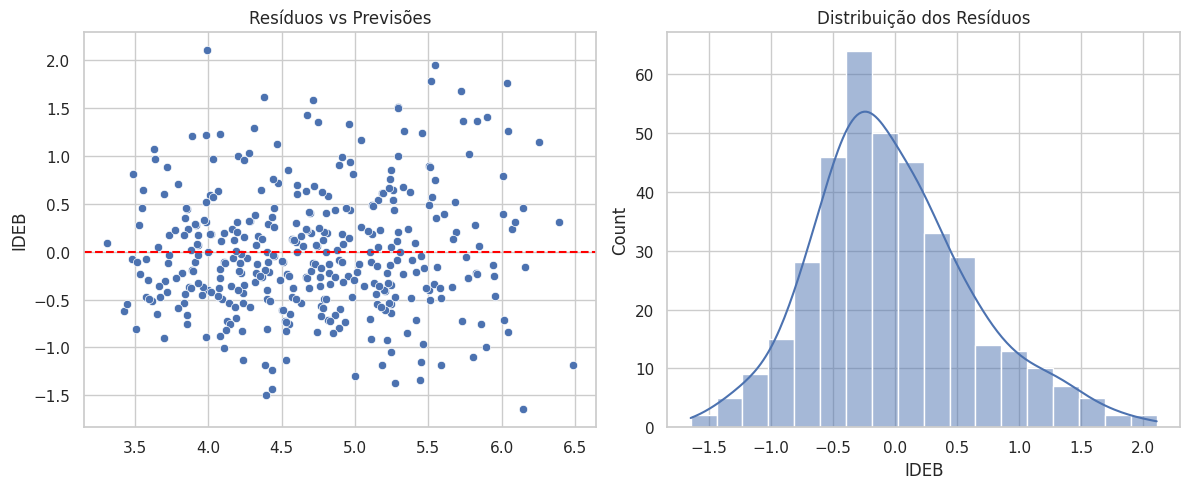

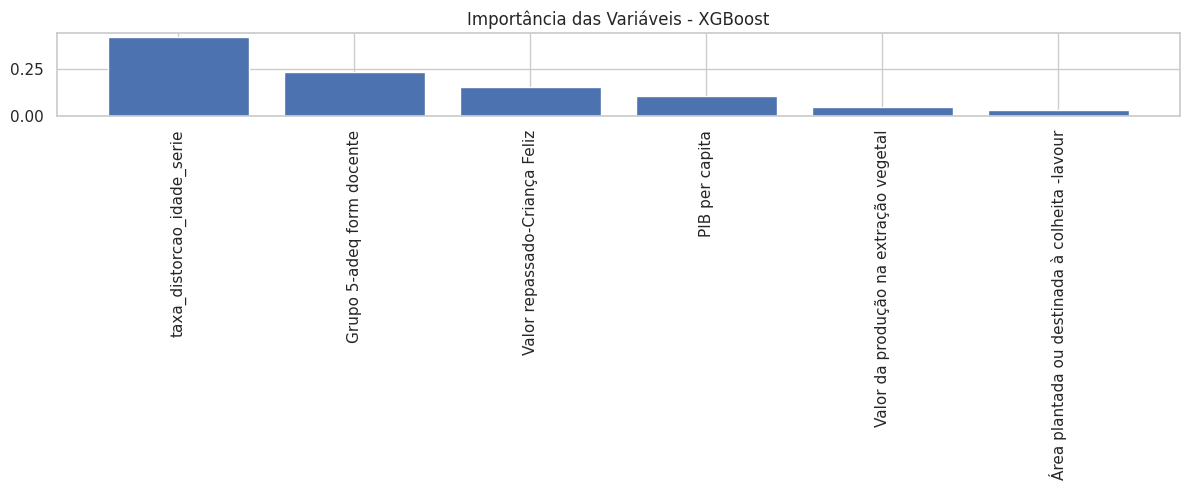


📊 Tabela de Importância das Variáveis - XGBoost:



,Variável,Importância
0,taxa_distorcao_idade_serie,0.4174
1,Grupo 5-adeq form docente,0.2338
2,Valor repassado-Criança Feliz,0.1561
3,PIB per capita,0.1069
4,Valor da produção na extração vegetal,0.0499
5,Área plantada ou destinada à colheita -lavour,0.0359



🏁 Decision Tree

🔍 Decision Tree - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6324
 - MAE: 0.4944
 - R² : 0.5400
📊 Teste:
 - RMSE: 0.7288
 - MAE: 0.5628
 - R² : 0.4275

📘 Decision Tree - Validação Cruzada (5-fold)
R² Médio: 0.4864 ± 0.0361
MAE Médio: 0.5224 ± 0.0220
RMSE Médio: 0.6669 ± 0.0216


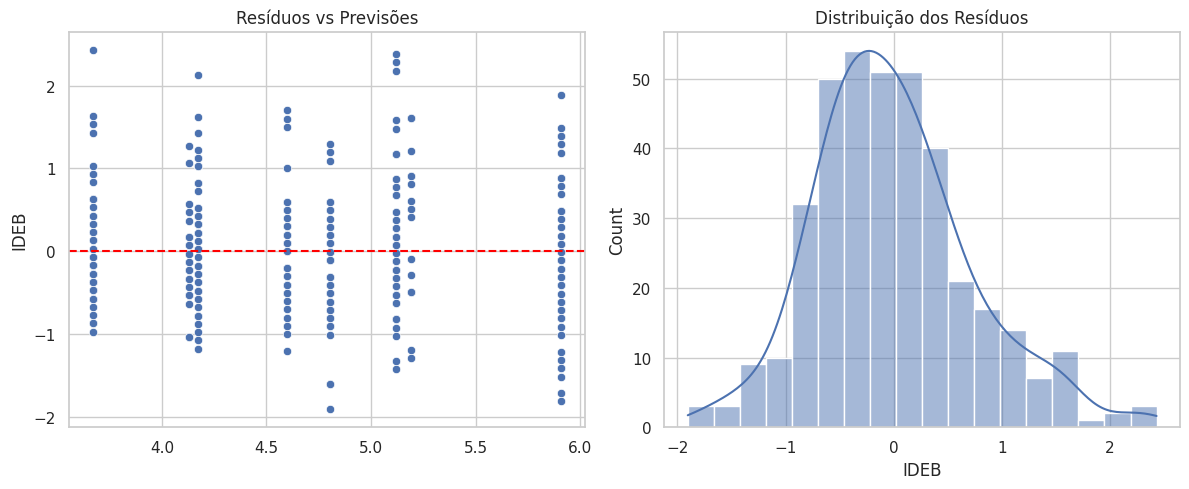

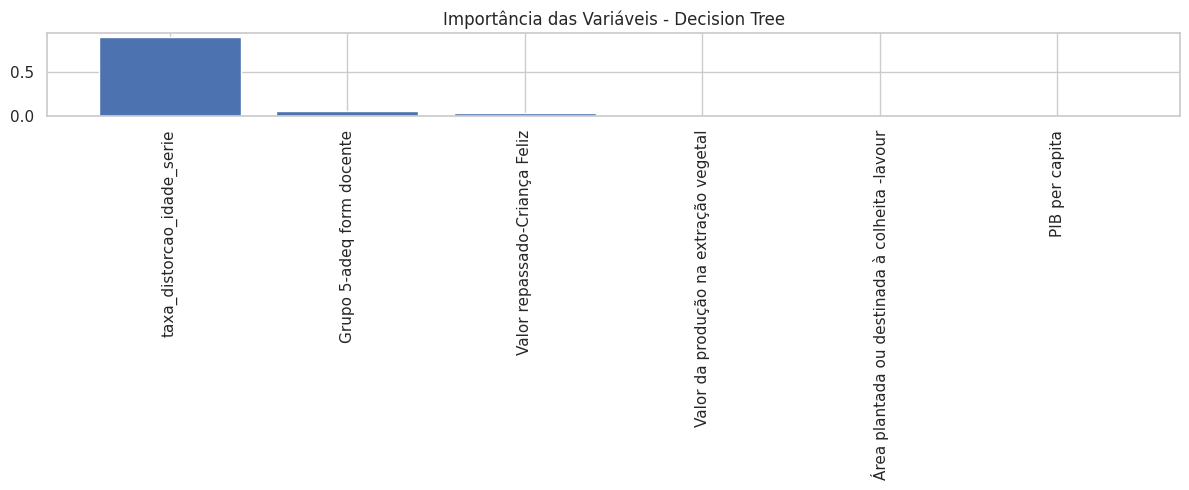


📊 Tabela de Importância das Variáveis - Decision Tree:



,Variável,Importância
0,taxa_distorcao_idade_serie,0.9007
1,Grupo 5-adeq form docente,0.0560
2,Valor repassado-Criança Feliz,0.0433
3,Valor da produção na extração vegetal,0.0000
4,Área plantada ou destinada à colheita -lavour,0.0000
5,PIB per capita,0.0000


In [12]:
# ========================================================
# CONFIGURAÇÃO DE AMBIENTE
# ========================================================
import tensorflow as tf
import random
import numpy as np

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


from xgboost.callback import EarlyStopping

def verificar_linearidade(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.title('Linearidade entre Preditores e Resposta')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def verificar_independencia(y_test, y_pred):
    residuos = y_test - y_pred
    dw = durbin_watson(residuos)
    print(f"📏 Estatística de Durbin-Watson: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("✅ Os resíduos são provavelmente independentes.")
    else:
        print("⚠️ Há indícios de autocorrelação nos resíduos.")

def verificar_homocedasticidade(y_test, y_pred):
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Previsão')
    plt.ylabel('Resíduo')
    plt.title('Resíduos vs Previsões')
    plt.subplot(1, 2, 2)
    sns.histplot(residuos, kde=True, bins=30)
    plt.xlabel('Resíduo')
    plt.title('Distribuição dos Resíduos')
    plt.tight_layout()
    plt.show()

def verificar_normalidade(y_test, y_pred):
    residuos = y_test - y_pred
    stat, p = shapiro(residuos)
    print(f"📊 Teste de Shapiro-Wilk: estatística={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print("✅ Os resíduos seguem uma distribuição normal.")
    else:
        print("⚠️ Os resíduos NÃO seguem uma distribuição normal.")

def verificar_multicolinearidade(X):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    display(vif_data.sort_values(by="VIF", ascending=False))


# =======================
# Funções de Avaliação
# =======================
# =======================
# Função de Avaliação Completa (Treino e Teste)
# =======================
def avaliar_modelo(nome_modelo, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas - Treinamento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Métricas - Teste
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n🔍 {nome_modelo} - Avaliação Completa")
    print("📊 Treinamento:")
    print(f" - RMSE: {rmse_train:.4f}")
    print(f" - MAE: {mae_train:.4f}")
    print(f" - R² : {r2_train:.4f}")

    print("📊 Teste:")
    print(f" - RMSE: {rmse_test:.4f}")
    print(f" - MAE: {mae_test:.4f}")
    print(f" - R² : {r2_test:.4f}")

    return modelo, y_pred_test

def validacao_cruzada(nome_modelo, modelo, X_train, y_train):
    scores_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    scores_mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    scores_rmse = np.sqrt(-cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    print(f"\n📘 {nome_modelo} - Validação Cruzada (5-fold)")
    print(f"R² Médio: {np.mean(scores_r2):.4f} ± {np.std(scores_r2):.4f}")
    print(f"MAE Médio: {abs(np.mean(scores_mae)):.4f} ± {np.std(scores_mae):.4f}")
    print(f"RMSE Médio: {np.mean(scores_rmse):.4f} ± {np.std(scores_rmse):.4f}")

# =======================
# Gráficos de Resíduos
# =======================
def graficos_residuos(y_test, y_pred):
    residuos = y_test - y_pred
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=y_pred, y=residuos, ax=ax[0])
    ax[0].axhline(0, linestyle='--', color='red')
    ax[0].set_title("Resíduos vs Previsões")
    sns.histplot(residuos, kde=True, ax=ax[1])
    ax[1].set_title("Distribuição dos Resíduos")
    plt.tight_layout()
    plt.show()

# =======================
# Verificação de Pressupostos (Regressão Linear)
# =======================
def verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred):
    print(f"\n🔎 Pressupostos - {nome_modelo}")
    verificar_linearidade(y_test, y_pred)
    verificar_independencia(y_test, y_pred)
    verificar_homocedasticidade(y_test, y_pred)
    verificar_normalidade(y_test, y_pred)
    verificar_multicolinearidade(X_train)

# =======================
# Importância das Variáveis
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.inspection import permutation_importance

def importancia_variaveis(nome_modelo, modelo, X, y=None):
    """
    Exibe gráfico e tabela de importância das variáveis para diferentes tipos de modelos:
    - Modelos com coef_ (Regressões)
    - Modelos com feature_importances_ (Árvores, Random Forest, XGBoost)
    - Outros modelos como SVR e KNN (usa permutação se y for fornecido)

    Parâmetros:
    - nome_modelo: string com o nome do modelo
    - modelo: modelo treinado
    - X: DataFrame com variáveis preditoras
    - y: Series com a variável resposta (necessária apenas para modelos sem coef_ ou feature_importances_)
    """

    # Garante que todas as colunas e linhas possam ser exibidas na tabela
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # 1. Caso o modelo tenha coef_ (ex: Regressão Linear)
    if hasattr(modelo, "coef_"):
        # Cria uma série com os coeficientes associados às variáveis
        coef = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico de barras
        coef.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os coeficientes ordenados
        tabela = pd.DataFrame({'Variável': coef.index, 'Importância': coef.values})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        # Exibe tabela interativa no Jupyter/Colab
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 2. Caso o modelo tenha feature_importances_ (ex: Random Forest, XGBoost)
    elif hasattr(modelo, "feature_importances_"):
        # Obtém importâncias e ordena os índices em ordem decrescente
        importancias = modelo.feature_importances_
        indices = np.argsort(importancias)[::-1]

        # Plota o gráfico de barras
        plt.figure(figsize=(12, 5))
        plt.bar(range(X.shape[1]), importancias[indices])
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.title(f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela ordenada com as variáveis e suas importâncias
        variaveis_ordenadas = X.columns[indices]
        importancias_ordenadas = importancias[indices]
        tabela = pd.DataFrame({'Variável': variaveis_ordenadas, 'Importância': importancias_ordenadas})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 3. Para modelos sem atributos diretos de importância (ex: SVR, KNN)
    elif y is not None:
        print(f"ℹ️ Modelo '{nome_modelo}' não possui coef_ nem feature_importances_. Utilizando Permutation Importance...")

        # Calcula a importância por permutação (model-agnostic)
        resultado = permutation_importance(modelo, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importancias = pd.Series(resultado.importances_mean, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico
        importancias.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis (Permutação) - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os resultados
        tabela = pd.DataFrame({
            'Variável': importancias.index,
            'Importância (média)': importancias.values
        })
        print(f"\n📊 Tabela de Importância das Variáveis (Permutação) - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância (média)': '{:.4f}'}))

    # 4. Caso não seja possível calcular a importância
    else:
        print(f"⚠️ O modelo '{nome_modelo}' não possui métodos para calcular importância e a variável y não foi fornecida.")

# =======================
# Execução de Todos os Modelos
# =======================
# =======================
# Execução de Todos os Modelos com Ajustes Anti-Overfitting
# =======================
def executar_modelos_completos(X, y):

    modelos = [
        ("Regressão Linear", LinearRegression()),

        ("Random Forest", RandomForestRegressor(
            n_estimators=300, # Random Forest → 100 a 500 usualmente.
            # Número de árvores que o modelo irá construir.
            # |Poucas árvores → modelo simples, risco de underfitting.
            # |Muitas árvores → modelo mais complexo e robusto, porém mais computacional e risco de overfitting se sem controle.

            max_depth=4, # Para dados tabulares → entre 3 e 7 é seguro.|Para evitar overfitting → reduzir para 2 ou 3.
            # Profundidade máxima permitida para cada árvore.
            # Muito profundo → árvores muito detalhadas, podem capturar ruídos → overfitting.
            # Muito raso → modelo muito simples, pode não capturar padrões → underfitting.

            min_samples_split=10, # 5 a 15 → boa faixa.| Para evitar overfitting → aumentar.
            # Número mínimo de amostras exigido para que um nó seja dividido.
            # Valor pequeno → árvore muito "ramificada", maior risco de overfitting.
            # Valor maior → impede divisões com pouca informação → modelo mais regularizado.

            min_samples_leaf=10, # Para dados pequenos → 1 a 5.| Para evitar overfitting → 10 a 15.
            # Número mínimo de amostras exigido para que uma folha exista.
            # Folhas muito pequenas → modelo ajustado ao ruído → overfitting.
            # Folhas maiores → menos divisão, modelo mais simples e generalizável.

            max_features='sqrt', # Random Forest → geralmente sqrt. | Pode ajustar para log2 ou None (usa todas as variáveis).
            # Número de variáveis consideradas ao tentar dividir um nó.
            # Randomização → evita correlação entre árvores → reduz overfitting.
            # sqrt → comum em regressão e classificação, reduz correlação entre árvores.

            random_state=42
        )),
        ("GBM", GradientBoostingRegressor(
            n_estimators=200, # GBM/XGBoost → até 1000, mas sempre com early_stopping.
            learning_rate=0.01, # 0.01 a 0.1. | Se diminuir → precisa aumentar n_estimators para compensar.
            # Peso de cada nova árvore no ajuste do modelo.
            # Alto (0.1+) → modelo aprende rápido, mas pode overfit.
            # Baixo (0.01) → aprendizado mais lento e seguro, evita overfitting.

            max_depth=3,

            subsample=0.8, # Entre 0.5 e 0.8 → muito usado para reduzir overfitting.
            # Fração das amostras usada para construir cada árvore.
            # Menor que 1 → aumenta diversidade entre árvores → reduz overfitting.
            # Muito pequeno → pode causar underfitting.

            min_samples_leaf=5,
            random_state=42
        )),
        ("XGBoost",XGBRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=2,
            subsample=0.8,

            colsample_bytree=0.8, # Entre 0.5 e 0.8.
            # Fração de variáveis consideradas para cada árvore.
            # Reduz a correlação entre árvores → menos overfitting.

            reg_alpha=1.0,  # L1 regularization
            #  Penalização para reduzir a complexidade do modelo (força o modelo a eliminar variáveis irrelevantes).
            # Evita overfitting, tornando o modelo mais simples.
            # Default: 0. | Em XGBoost, usar 1.0 ou mais para ajudar na regularização.

            reg_lambda=10.0,  # L2 regularization
            # Penalização que reduz o tamanho dos coeficientes, suavizando o modelo.
            # Ajuda a evitar overfitting.
            # Default: 1. | Recomendado: 10 → regularização forte.

            n_jobs=-1,
            random_state=42

        )
        ),
        ("Decision Tree", DecisionTreeRegressor(
            max_depth=3,
            min_samples_split=15,
            min_samples_leaf=10,
            random_state=42
        ))
    ]

    for nome_modelo, modelo in modelos:
        print("\n" + "="*60)
        print(f"🏁 {nome_modelo}")
        print("="*60)

        # Treinamento
        if nome_modelo == "XGBoost":
            modelo.fit(
                X_train, y_train,
               # eval_set=[(X_test, y_test)],
               # callbacks=[EarlyStopping(rounds=50)]
            )
        else:
            modelo.fit(X_train, y_train)
        #Previsão
        y_pred = modelo.predict(X_test)

        # Avaliação
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n🔍 {nome_modelo} - Avaliação Completa")
        print("📊 Treinamento:")
        y_pred_train = modelo.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        print(f" - RMSE: {rmse_train:.4f}")
        print(f" - MAE: {mae_train:.4f}")
        print(f" - R² : {r2_train:.4f}")

        print("📊 Teste:")
        print(f" - RMSE: {rmse:.4f}")
        print(f" - MAE: {mae:.4f}")
        print(f" - R² : {r2:.4f}")

        # Validação cruzada
        validacao_cruzada(nome_modelo, modelo, X_train, y_train)

        # Gráficos de resíduos
        graficos_residuos(y_test, y_pred)

        # Verificação dos pressupostos da regressão linear
        if nome_modelo.lower() == "regressão linear":
            verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred)

        # Importância das variáveis
        importancia_variaveis(nome_modelo, modelo, X_train, y_train)


executar_modelos_completos(X, y)

### **Usando SHAP**


🏁 Regressão Linear

🔍 Regressão Linear - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4968
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5037

📘 Regressão Linear - Validação Cruzada (5-fold)
R² Médio: 0.5227 ± 0.0351
MAE Médio: 0.5014 ± 0.0180
RMSE Médio: 0.6430 ± 0.0261


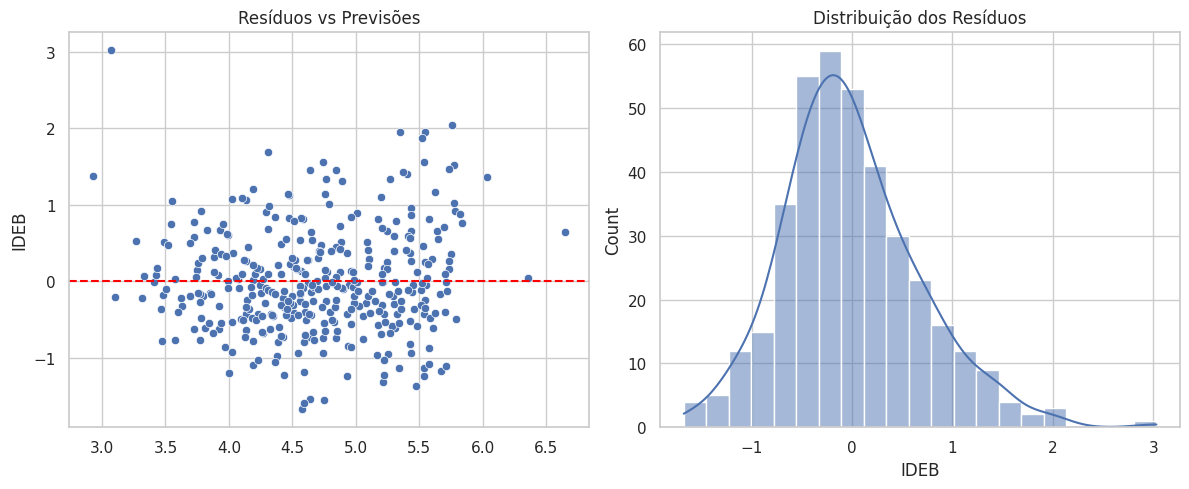


🔎 Pressupostos - Regressão Linear


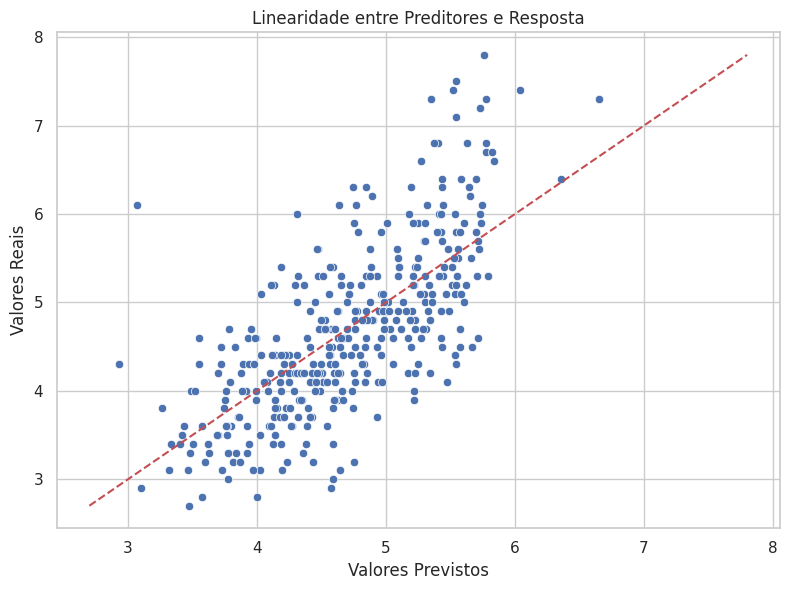

📏 Estatística de Durbin-Watson: 2.0480
✅ Os resíduos são provavelmente independentes.


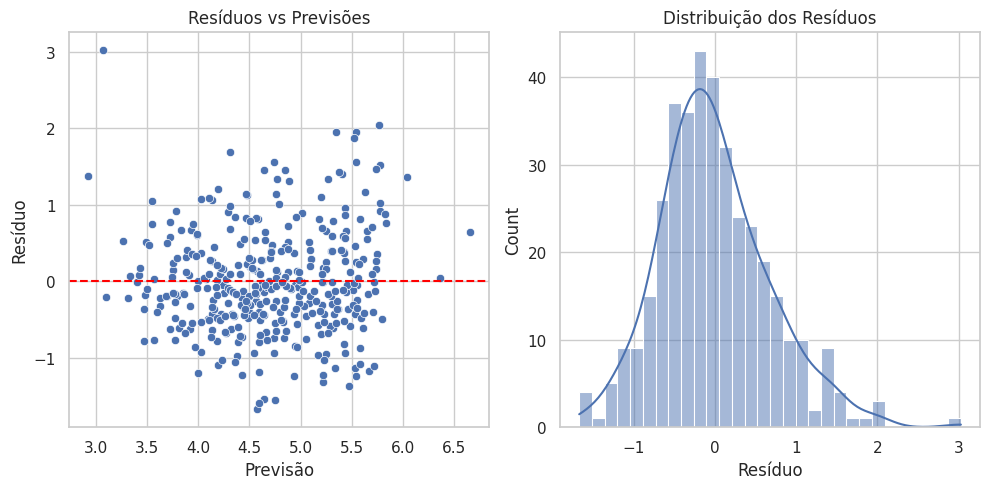

📊 Teste de Shapiro-Wilk: estatística=0.9782, p-valor=0.0000
⚠️ Os resíduos NÃO seguem uma distribuição normal.


,Variável,VIF
1,taxa_distorcao_idade_serie,3.560319
2,Grupo 5-adeq form docente,3.355076
0,PIB per capita,3.258260
3,Área plantada ou destinada à colheita -lavour,2.290470
5,Valor repassado-Criança Feliz,1.506312
4,Valor da produção na extração vegetal,1.357908



Importâncias SHAP – Regressão Linear


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.428111,-0.091490,-1.0,0.447339,0.624581
1,Grupo 5-adeq form docente,0.156330,-0.011019,-1.0,0.562854,0.228073
2,Valor repassado-Criança Feliz,0.049469,0.003534,1.0,0.443941,0.072171
3,Valor da produção na extração vegetal,0.033535,0.001028,1.0,0.286523,0.048924
4,Área plantada ou destinada à colheita -lavour,0.013822,-0.000863,1.0,0.110985,0.020166
5,PIB per capita,0.004171,-0.000652,1.0,0.168743,0.006085



📘 Interpretação com SHAP - Regressão Linear


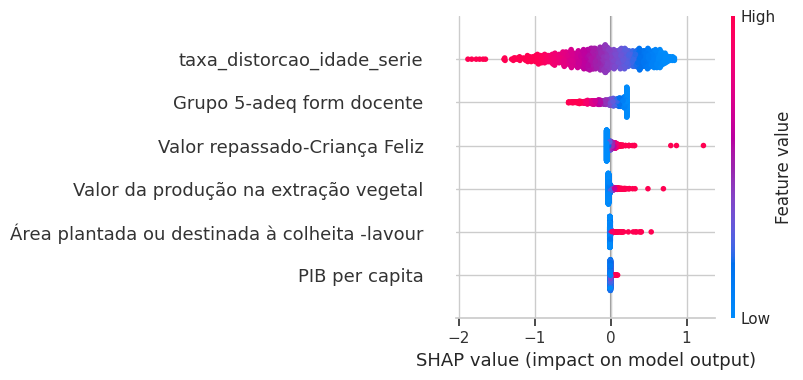


🏁 Lasso

🔍 Lasso - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6369
 - MAE: 0.4966
 - R² : 0.5335
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5038

📘 Lasso - Validação Cruzada (5-fold)
R² Médio: 0.5221 ± 0.0353
MAE Médio: 0.5014 ± 0.0179
RMSE Médio: 0.6434 ± 0.0267


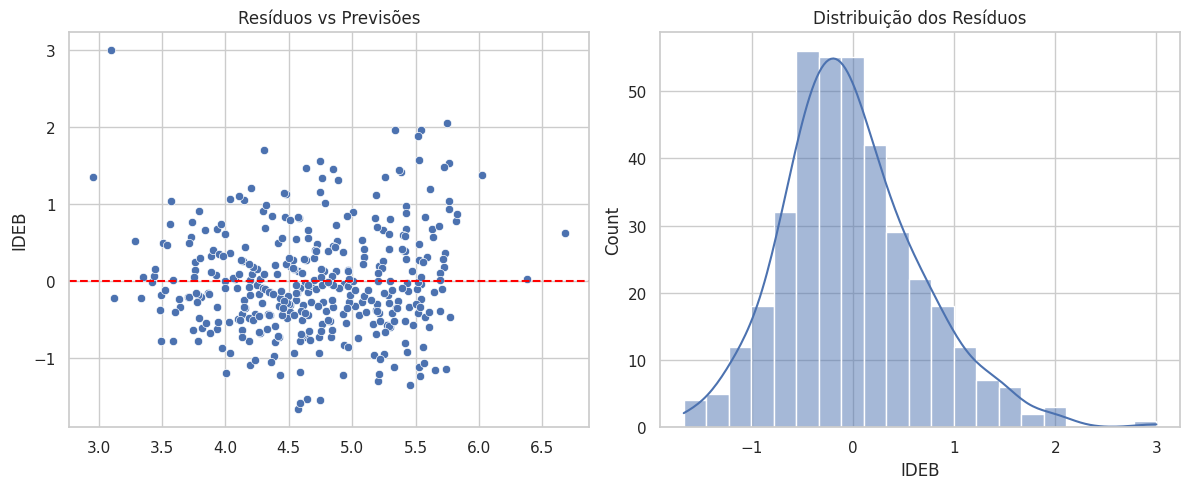


Importâncias SHAP – Lasso


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.420051,-0.089768,-1.0,0.447339,0.618224
1,Grupo 5-adeq form docente,0.155972,-0.010994,-1.0,0.562854,0.229557
2,Valor repassado-Criança Feliz,0.051066,0.003648,1.0,0.443941,0.075159
3,Valor da produção na extração vegetal,0.033532,0.001028,1.0,0.286523,0.049352
4,Área plantada ou destinada à colheita -lavour,0.013122,-0.000819,1.0,0.110985,0.019312
5,PIB per capita,0.005705,-0.000891,1.0,0.168743,0.008397



📘 Interpretação com SHAP - Lasso


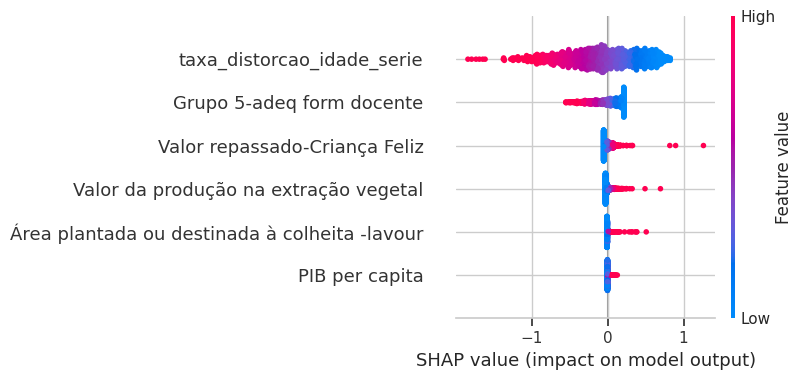


🏁 Ridge

🔍 Ridge - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4968
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5037

📘 Ridge - Validação Cruzada (5-fold)
R² Médio: 0.5227 ± 0.0351
MAE Médio: 0.5014 ± 0.0180
RMSE Médio: 0.6430 ± 0.0261


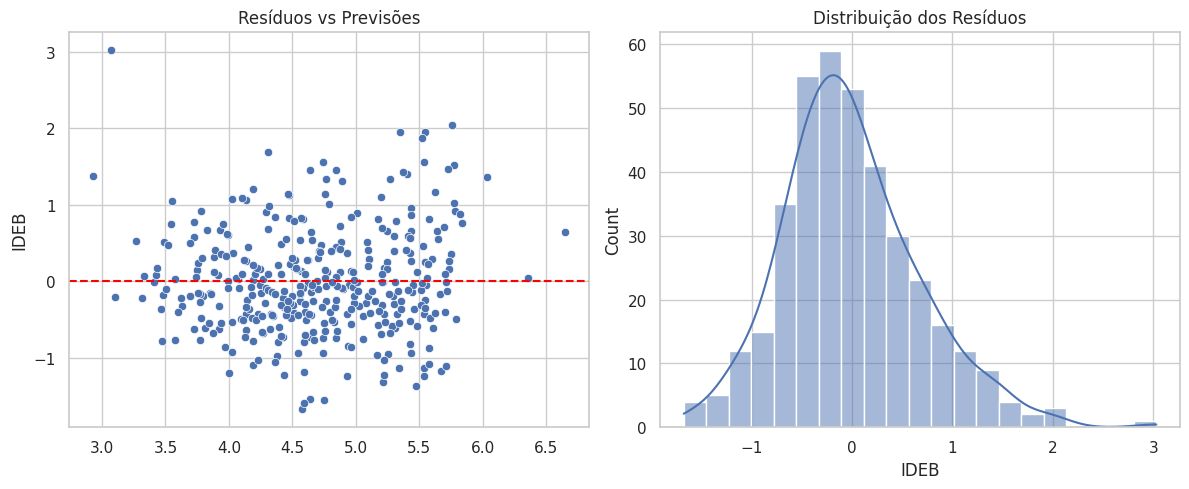


Importâncias SHAP – Ridge


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.428106,-0.091489,-1.0,0.447339,0.624575
1,Grupo 5-adeq form docente,0.156332,-0.011019,-1.0,0.562854,0.228077
2,Valor repassado-Criança Feliz,0.049469,0.003534,1.0,0.443941,0.072172
3,Valor da produção na extração vegetal,0.033535,0.001029,1.0,0.286523,0.048925
4,Área plantada ou destinada à colheita -lavour,0.013822,-0.000863,1.0,0.110985,0.020165
5,PIB per capita,0.004171,-0.000652,1.0,0.168743,0.006086



📘 Interpretação com SHAP - Ridge


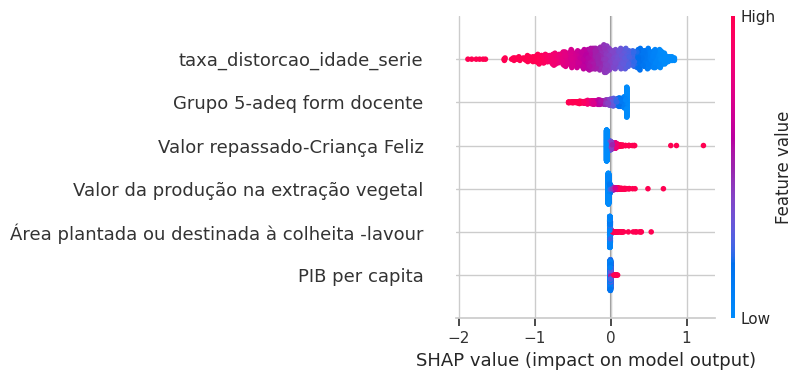


🏁 Elastic Net

🔍 Elastic Net - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4967
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5038

📘 Elastic Net - Validação Cruzada (5-fold)
R² Médio: 0.5224 ± 0.0352
MAE Médio: 0.5014 ± 0.0179
RMSE Médio: 0.6432 ± 0.0264


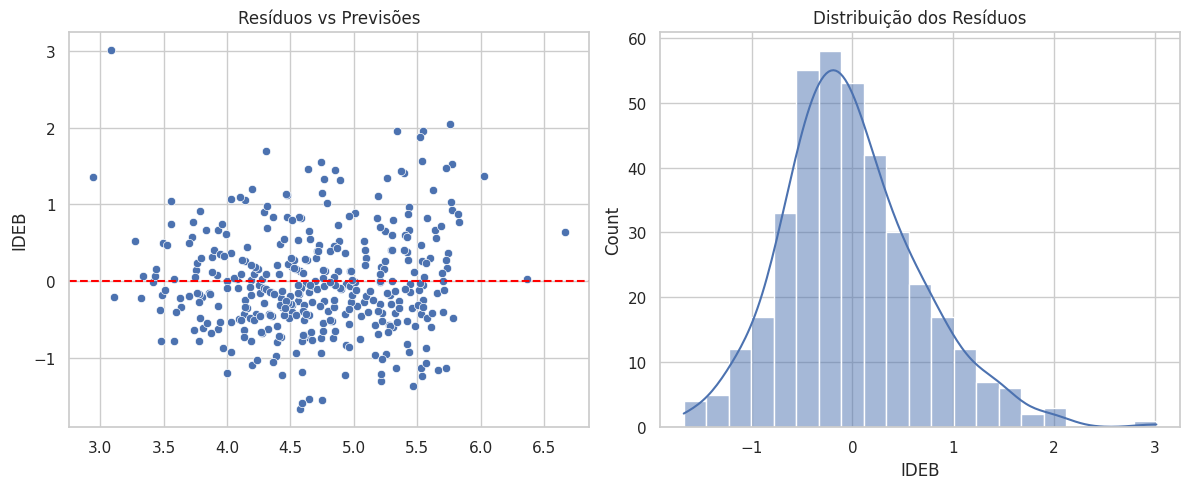


Importâncias SHAP – Elastic Net


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.423854,-0.090581,-1.0,0.447339,0.621159
1,Grupo 5-adeq form docente,0.156240,-0.011013,-1.0,0.562854,0.228969
2,Valor repassado-Criança Feliz,0.050295,0.003593,1.0,0.443941,0.073707
3,Valor da produção na extração vegetal,0.033541,0.001029,1.0,0.286523,0.049155
4,Área plantada ou destinada à colheita -lavour,0.013464,-0.000841,1.0,0.110985,0.019731
5,PIB per capita,0.004967,-0.000776,1.0,0.168743,0.007279



📘 Interpretação com SHAP - Elastic Net


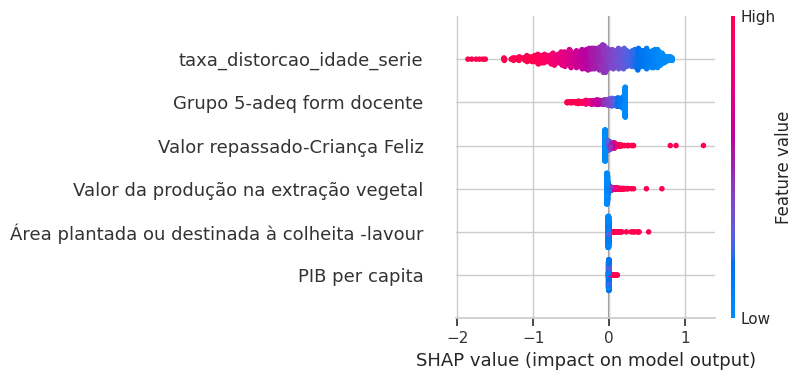


🏁 Random Forest

🔍 Random Forest - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5889
 - MAE: 0.4548
 - R² : 0.6012
📊 Teste:
 - RMSE: 0.6657
 - MAE: 0.5192
 - R² : 0.5222

📘 Random Forest - Validação Cruzada (5-fold)
R² Médio: 0.5311 ± 0.0292
MAE Médio: 0.4917 ± 0.0245
RMSE Médio: 0.6373 ± 0.0193


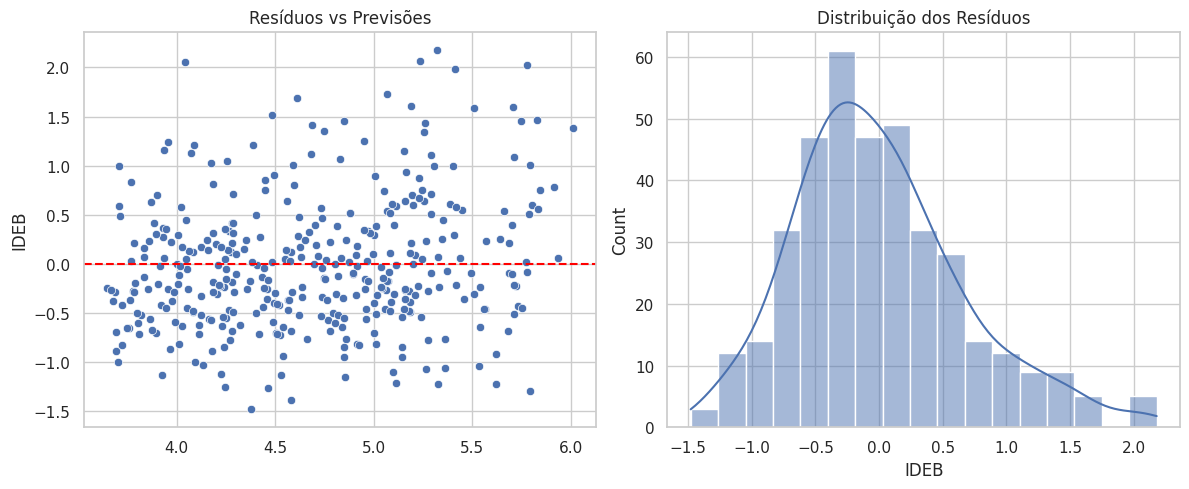


Importâncias SHAP – Random Forest


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.326457,-0.002333,-0.986390,0.518686,0.447210
1,Grupo 5-adeq form docente,0.148066,-0.000908,-0.972679,0.499434,0.202834
2,Valor repassado-Criança Feliz,0.128405,-0.000385,0.857141,0.560589,0.175900
3,PIB per capita,0.088855,0.004189,0.959970,0.599094,0.121721
4,Valor da produção na extração vegetal,0.027776,-0.000660,0.775929,0.372593,0.038050
5,Área plantada ou destinada à colheita -lavour,0.010428,0.000779,0.761814,0.561721,0.014285



📘 Interpretação com SHAP - Random Forest


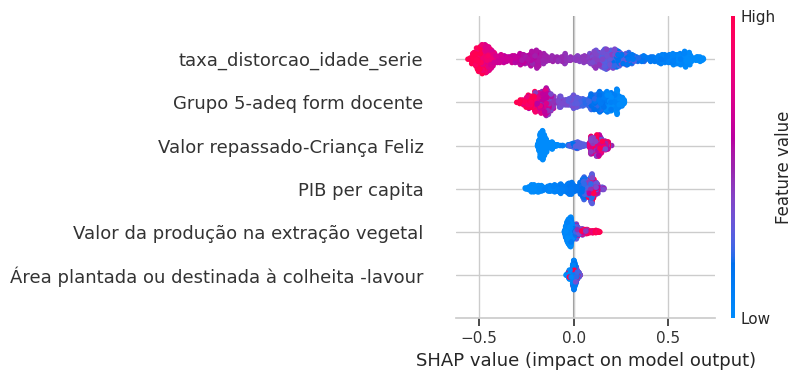


🏁 GBM

🔍 GBM - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5821
 - MAE: 0.4535
 - R² : 0.6102
📊 Teste:
 - RMSE: 0.6726
 - MAE: 0.5254
 - R² : 0.5123

📘 GBM - Validação Cruzada (5-fold)
R² Médio: 0.5270 ± 0.0256
MAE Médio: 0.4973 ± 0.0211
RMSE Médio: 0.6403 ± 0.0219


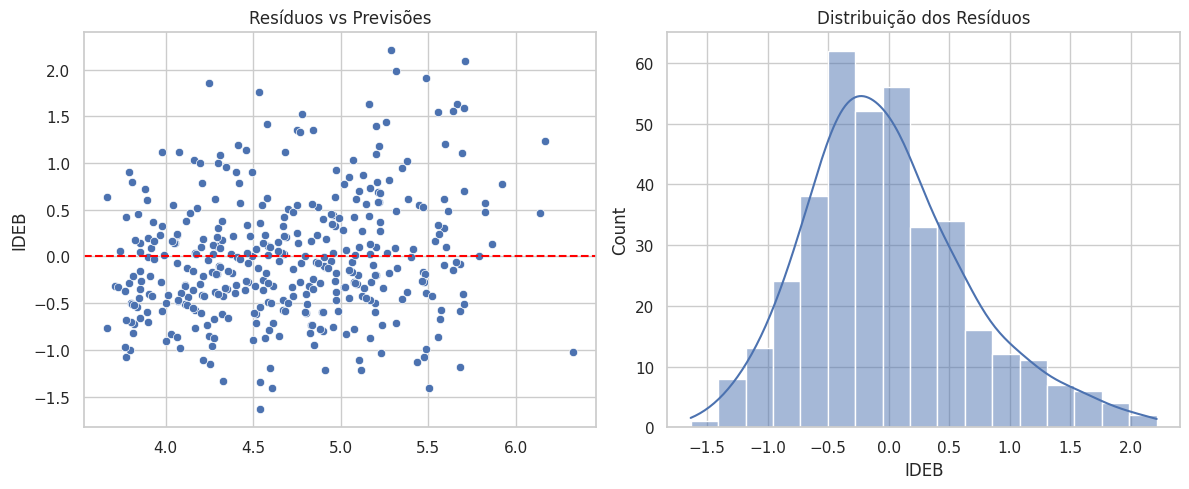


Importâncias SHAP – GBM


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.420800,-0.004545,-0.993148,0.511891,0.624462
1,Grupo 5-adeq form docente,0.109592,-0.006507,-0.916032,0.454134,0.162634
2,Valor repassado-Criança Feliz,0.063524,0.012001,0.705344,0.584371,0.094270
3,PIB per capita,0.033691,0.000335,0.794257,0.776897,0.049997
4,Valor da produção na extração vegetal,0.031661,-0.000377,0.834281,0.362401,0.046984
5,Área plantada ou destinada à colheita -lavour,0.014591,0.000484,0.882307,0.526614,0.021653



📘 Interpretação com SHAP - GBM


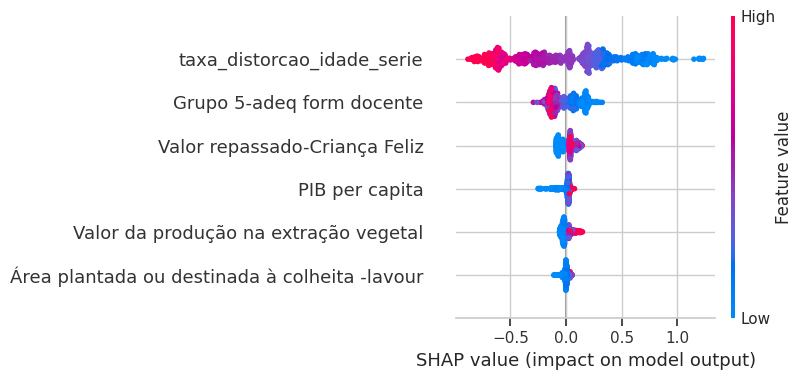


🏁 XGBoost

🔍 XGBoost - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5606
 - MAE: 0.4354
 - R² : 0.6385
📊 Teste:
 - RMSE: 0.6431
 - MAE: 0.5050
 - R² : 0.5542

📘 XGBoost - Validação Cruzada (5-fold)
R² Médio: 0.5455 ± 0.0293
MAE Médio: 0.4867 ± 0.0197
RMSE Médio: 0.6275 ± 0.0216


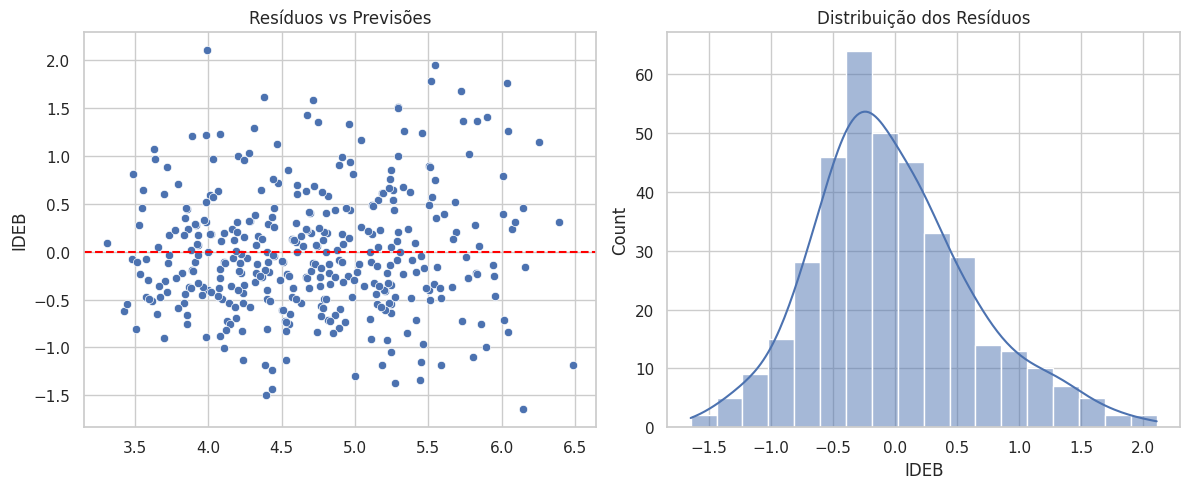


Importâncias SHAP – XGBoost


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.417232,0.002820,-0.996418,0.515289,0.495734
1,Grupo 5-adeq form docente,0.173437,-0.006369,-0.964552,0.464326,0.206069
2,Valor repassado-Criança Feliz,0.084973,0.003751,0.644656,0.480181,0.100960
3,Valor da produção na extração vegetal,0.061856,-0.000296,0.757069,0.493771,0.073494
4,PIB per capita,0.060830,-0.001574,0.934206,0.661382,0.072275
5,Área plantada ou destinada à colheita -lavour,0.043319,0.000588,0.801262,0.706682,0.051469



📘 Interpretação com SHAP - XGBoost


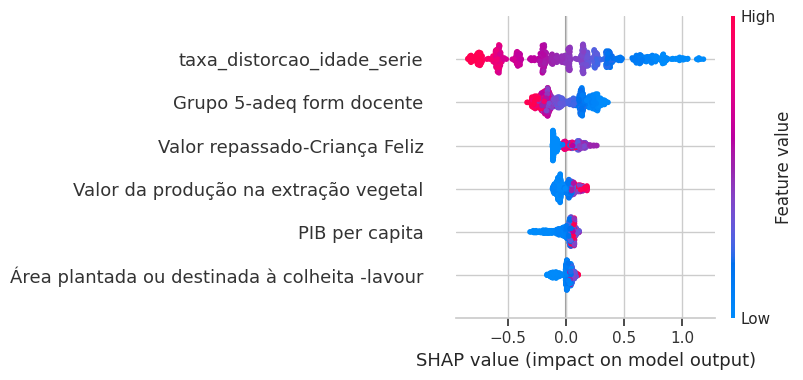


🏁 Decision Tree

🔍 Decision Tree - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6324
 - MAE: 0.4944
 - R² : 0.5400
📊 Teste:
 - RMSE: 0.7288
 - MAE: 0.5628
 - R² : 0.4275

📘 Decision Tree - Validação Cruzada (5-fold)
R² Médio: 0.4864 ± 0.0361
MAE Médio: 0.5224 ± 0.0220
RMSE Médio: 0.6669 ± 0.0216


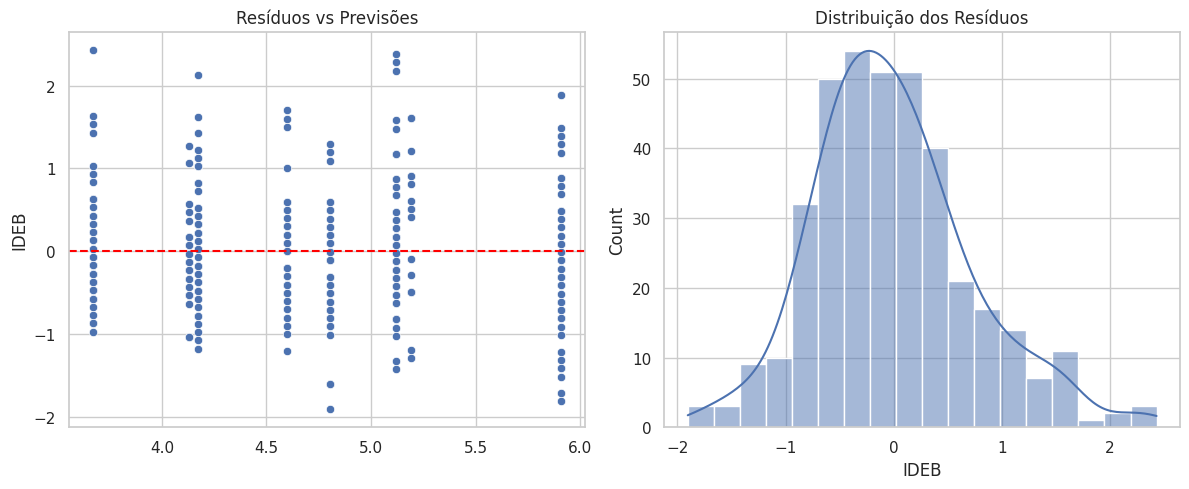


Importâncias SHAP – Decision Tree


,Variável,SHAP_|mean|,SHAP_mean,"Spearman(feature, SHAP)",Frac_SHAP_positivo,SHAP_|mean|_norm
0,taxa_distorcao_idade_serie,0.522850,0.00654,-0.927459,0.532276,0.714593
1,Grupo 5-adeq form docente,0.109062,-0.02815,-0.761522,0.440544,0.149058
2,Valor repassado-Criança Feliz,0.099763,0.02161,0.743095,0.590034,0.136349
3,PIB per capita,0.000000,0.00000,NaN,0.000000,0.000000
4,Área plantada ou destinada à colheita -lavour,0.000000,0.00000,NaN,0.000000,0.000000
5,Valor da produção na extração vegetal,0.000000,0.00000,NaN,0.000000,0.000000



📘 Interpretação com SHAP - Decision Tree


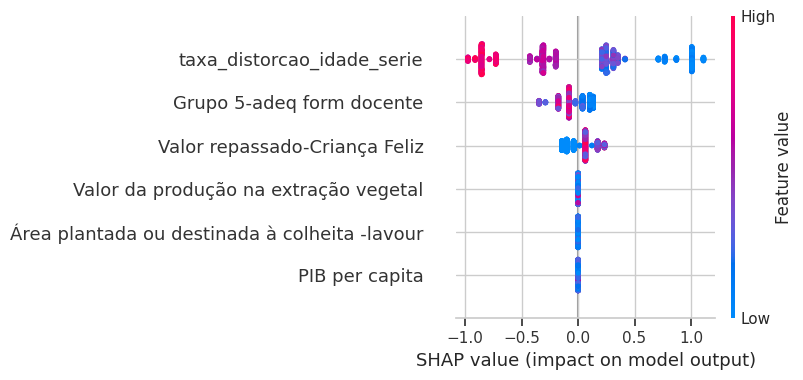


🏁 KNN

🔍 KNN - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.7243
 - MAE: 0.5659
 - R² : 0.3966
📊 Teste:
 - RMSE: 0.8622
 - MAE: 0.6932
 - R² : 0.1987

📘 KNN - Validação Cruzada (5-fold)
R² Médio: 0.1745 ± 0.0530
MAE Médio: 0.6672 ± 0.0271
RMSE Médio: 0.8453 ± 0.0130


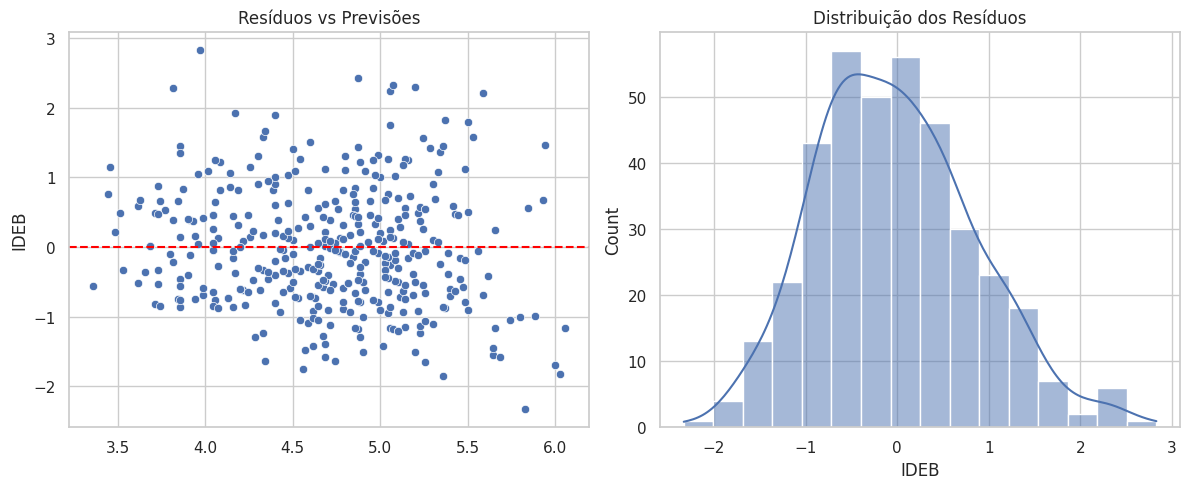

⚠️ Modelo 'KNeighborsRegressor' não é suportado pelo TreeExplainer/LinearExplainer. Pulando SHAP.

Importâncias SHAP – KNN


""



📘 Interpretação com SHAP - KNN
⚠️ SHAP não suportado para KNN.

🏁 SVR

🔍 SVR - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.8132
 - MAE: 0.6325
 - R² : 0.2394
📊 Teste:
 - RMSE: 0.8631
 - MAE: 0.6842
 - R² : 0.1970

📘 SVR - Validação Cruzada (5-fold)
R² Médio: 0.2105 ± 0.0369
MAE Médio: 0.6495 ± 0.0110
RMSE Médio: 0.8272 ± 0.0215


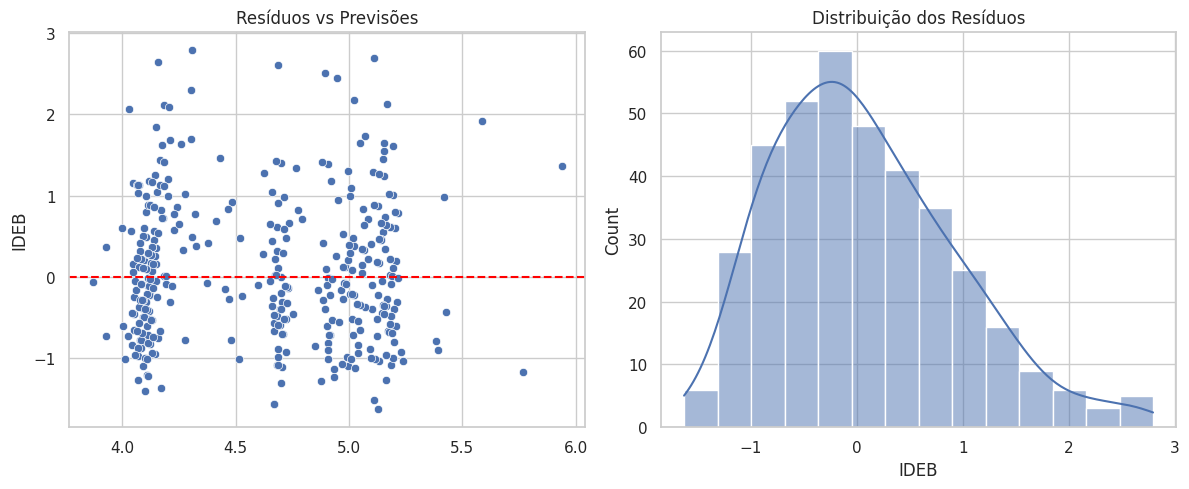

⚠️ Modelo 'SVR' não é suportado pelo TreeExplainer/LinearExplainer. Pulando SHAP.

Importâncias SHAP – SVR


""



📘 Interpretação com SHAP - SVR
⚠️ SHAP não suportado para SVR.


In [13]:
# Utilizando SHAP

# ========================================================
# CONFIGURAÇÃO DE AMBIENTE
# ========================================================
import tensorflow as tf
import random
import numpy as np

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


from xgboost.callback import EarlyStopping

def verificar_linearidade(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.title('Linearidade entre Preditores e Resposta')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def verificar_independencia(y_test, y_pred):
    residuos = y_test - y_pred
    dw = durbin_watson(residuos)
    print(f"📏 Estatística de Durbin-Watson: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("✅ Os resíduos são provavelmente independentes.")
    else:
        print("⚠️ Há indícios de autocorrelação nos resíduos.")

def verificar_homocedasticidade(y_test, y_pred):
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Previsão')
    plt.ylabel('Resíduo')
    plt.title('Resíduos vs Previsões')
    plt.subplot(1, 2, 2)
    sns.histplot(residuos, kde=True, bins=30)
    plt.xlabel('Resíduo')
    plt.title('Distribuição dos Resíduos')
    plt.tight_layout()
    plt.show()

def verificar_normalidade(y_test, y_pred):
    residuos = y_test - y_pred
    stat, p = shapiro(residuos)
    print(f"📊 Teste de Shapiro-Wilk: estatística={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print("✅ Os resíduos seguem uma distribuição normal.")
    else:
        print("⚠️ Os resíduos NÃO seguem uma distribuição normal.")

def verificar_multicolinearidade(X):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    display(vif_data.sort_values(by="VIF", ascending=False))


# =======================
# Funções de Avaliação
# =======================
# =======================
# Função de Avaliação Completa (Treino e Teste)
# =======================
def avaliar_modelo(nome_modelo, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas - Treinamento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Métricas - Teste
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n🔍 {nome_modelo} - Avaliação Completa")
    print("📊 Treinamento:")
    print(f" - RMSE: {rmse_train:.4f}")
    print(f" - MAE: {mae_train:.4f}")
    print(f" - R² : {r2_train:.4f}")

    print("📊 Teste:")
    print(f" - RMSE: {rmse_test:.4f}")
    print(f" - MAE: {mae_test:.4f}")
    print(f" - R² : {r2_test:.4f}")

    return modelo, y_pred_test

def validacao_cruzada(nome_modelo, modelo, X_train, y_train):
    scores_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    scores_mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    scores_rmse = np.sqrt(-cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    print(f"\n📘 {nome_modelo} - Validação Cruzada (5-fold)")
    print(f"R² Médio: {np.mean(scores_r2):.4f} ± {np.std(scores_r2):.4f}")
    print(f"MAE Médio: {abs(np.mean(scores_mae)):.4f} ± {np.std(scores_mae):.4f}")
    print(f"RMSE Médio: {np.mean(scores_rmse):.4f} ± {np.std(scores_rmse):.4f}")

# =======================
# Gráficos de Resíduos
# =======================
def graficos_residuos(y_test, y_pred):
    residuos = y_test - y_pred
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=y_pred, y=residuos, ax=ax[0])
    ax[0].axhline(0, linestyle='--', color='red')
    ax[0].set_title("Resíduos vs Previsões")
    sns.histplot(residuos, kde=True, ax=ax[1])
    ax[1].set_title("Distribuição dos Resíduos")
    plt.tight_layout()
    plt.show()

# =======================
# Verificação de Pressupostos (Regressão Linear)
# =======================
def verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred):
    print(f"\n🔎 Pressupostos - {nome_modelo}")
    verificar_linearidade(y_test, y_pred)
    verificar_independencia(y_test, y_pred)
    verificar_homocedasticidade(y_test, y_pred)
    verificar_normalidade(y_test, y_pred)
    verificar_multicolinearidade(X_train)


# =======================
# Importância das Variáveis
# =======================
# =======================
# Importância das Variáveis
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.inspection import permutation_importance

def importancia_variaveis(nome_modelo, modelo, X, y=None):
    """
    Exibe gráfico e tabela de importância das variáveis para diferentes tipos de modelos:
    - Modelos com coef_ (Regressões)
    - Modelos com feature_importances_ (Árvores, Random Forest, XGBoost)
    - Outros modelos como SVR e KNN (usa permutação se y for fornecido)

    Parâmetros:
    - nome_modelo: string com o nome do modelo
    - modelo: modelo treinado
    - X: DataFrame com variáveis preditoras
    - y: Series com a variável resposta (necessária apenas para modelos sem coef_ ou feature_importances_)
    """

    # Garante que todas as colunas e linhas possam ser exibidas na tabela
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # 1. Caso o modelo tenha coef_ (ex: Regressão Linear)
    if hasattr(modelo, "coef_"):
        # Cria uma série com os coeficientes associados às variáveis
        coef = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico de barras
        coef.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os coeficientes ordenados
        tabela = pd.DataFrame({'Variável': coef.index, 'Importância': coef.values})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        # Exibe tabela interativa no Jupyter/Colab
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 2. Caso o modelo tenha feature_importances_ (ex: Random Forest, XGBoost)
    elif hasattr(modelo, "feature_importances_"):
        # Obtém importâncias e ordena os índices em ordem decrescente
        importancias = modelo.feature_importances_
        indices = np.argsort(importancias)[::-1]

        # Plota o gráfico de barras
        plt.figure(figsize=(12, 5))
        plt.bar(range(X.shape[1]), importancias[indices])
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.title(f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela ordenada com as variáveis e suas importâncias
        variaveis_ordenadas = X.columns[indices]
        importancias_ordenadas = importancias[indices]
        tabela = pd.DataFrame({'Variável': variaveis_ordenadas, 'Importância': importancias_ordenadas})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 3. Para modelos sem atributos diretos de importância (ex: SVR, KNN)
    elif y is not None:
        print(f"ℹ️ Modelo '{nome_modelo}' não possui coef_ nem feature_importances_. Utilizando Permutation Importance...")

        # Calcula a importância por permutação (model-agnostic)
        resultado = permutation_importance(modelo, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importancias = pd.Series(resultado.importances_mean, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico
        importancias.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis (Permutação) - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os resultados
        tabela = pd.DataFrame({
            'Variável': importancias.index,
            'Importância (média)': importancias.values
        })
        print(f"\n📊 Tabela de Importância das Variáveis (Permutação) - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância (média)': '{:.4f}'}))

    # 4. Caso não seja possível calcular a importância
    else:
        print(f"⚠️ O modelo '{nome_modelo}' não possui métodos para calcular importância e a variável y não foi fornecida.")



# =======================
# Interpretação com SHAP (opcional para modelos suportados)
# =======================
import shap

def interpretar_com_shap(modelo, X_amostra, nome_modelo):
    """
    Gera gráfico de SHAP para modelos compatíveis (árvores ou regressões lineares).
    """
    print(f"\n📘 Interpretação com SHAP - {nome_modelo}")

    try:
        if hasattr(modelo, "predict_proba") or hasattr(modelo, "feature_importances_"):
            explainer = shap.TreeExplainer(modelo)
        elif hasattr(modelo, "coef_"):
            explainer = shap.LinearExplainer(modelo, X_amostra)
        else:
            print(f"⚠️ SHAP não suportado para {nome_modelo}.")
            return

        shap_values = explainer.shap_values(X_amostra)

        # Gráfico resumido
        shap.summary_plot(shap_values, X_amostra, feature_names=X_amostra.columns, show=True)


    except Exception as e:
        print(f"❌ Erro ao gerar SHAP para {nome_modelo}: {e}")


def listar_importancias(modelo, X, y=None, usar_shap=False):
    import pandas as pd
    import numpy as np
    from sklearn.inspection import permutation_importance

    if hasattr(modelo, "get_booster"):
        booster = modelo.get_booster()
        gain_dict = booster.get_score(importance_type='gain')
        imp = pd.Series({f"f{i}": gain_dict.get(f"f{i}", 0.0) for i in range(X.shape[1])})
        mapa = {f"f{i}": col for i, col in enumerate(X.columns)}
        df = pd.DataFrame({"Variável": [mapa[k] for k in imp.index], "Importância": imp.values})

    elif hasattr(modelo, "feature_importances_"):
        df = pd.DataFrame({"Variável": X.columns, "Importância": modelo.feature_importances_})

    elif hasattr(modelo, "coef_"):
        df = pd.DataFrame({"Variável": X.columns, "Importância": np.abs(np.ravel(modelo.coef_))})

    elif y is not None:
        r = permutation_importance(modelo, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        df = pd.DataFrame({"Variável": X.columns, "Importância": r.importances_mean})
    else:
        raise ValueError("Modelo sem método de importância e y não fornecido.")

    df["Importância_Normalizada"] = df["Importância"] / (df["Importância"].sum() + 1e-12)
    return df.sort_values("Importância", ascending=False).reset_index(drop=True)

def listar_importancias_shap(modelo, X_ref):
    import shap
    import numpy as np
    import pandas as pd
    # Ignorar modelos que não são suportados diretamente
    modelos_suportados = ("feature_importances_", "coef_")
    if not any(hasattr(modelo, attr) for attr in modelos_suportados):
        print(f"⚠️ Modelo '{type(modelo).__name__}' não é suportado pelo TreeExplainer/LinearExplainer. Pulando SHAP.")
        return pd.DataFrame()

    # Escolhe o explainer adequado
    if hasattr(modelo, "feature_importances_"):
        explainer = shap.TreeExplainer(modelo)
    elif hasattr(modelo, "coef_"):
        explainer = shap.LinearExplainer(modelo, X_ref, feature_perturbation="interventional")
    else:
        explainer = shap.Explainer(modelo, X_ref)

    shap_values = explainer.shap_values(X_ref)
    # Compatibilidade: multiclasses → média entre classes
    sv = np.array(shap_values)
    if sv.ndim == 3:  # (n_classes, n_amostras, n_features)
        sv = sv.mean(axis=0)  # média entre classes

    mean_abs = np.abs(sv).mean(axis=0)
    mean_signed = sv.mean(axis=0)

    # Direção monotônica aproximada via Spearman entre valor da feature e SHAP
    from scipy.stats import spearmanr
    rhos = []
    frac_pos = []
    for j, col in enumerate(X_ref.columns):
        rho, _ = spearmanr(X_ref[col].values, sv[:, j])
        rhos.append(rho)
        frac_pos.append((sv[:, j] > 0).mean())

    df = pd.DataFrame({
        "Variável": X_ref.columns,
        "SHAP_|mean|": mean_abs,
        "SHAP_mean": mean_signed,
        "Spearman(feature, SHAP)": rhos,
        "Frac_SHAP_positivo": frac_pos
    })
    df["SHAP_|mean|_norm"] = df["SHAP_|mean|"] / (df["SHAP_|mean|"].sum() + 1e-12)
    df = df.sort_values("SHAP_|mean|", ascending=False).reset_index(drop=True)
    return df

# =======================
# Execução de Todos os Modelos
# =======================
# =======================
# Execução de Todos os Modelos com Ajustes Anti-Overfitting
# =======================
def executar_modelos_completos(X, y):

    modelos = [
        ("Regressão Linear", LinearRegression()),
        ("Lasso", Lasso(alpha=0.1)),
        ("Ridge", Ridge(alpha=1.0)),
        ("Elastic Net", ElasticNet(alpha=0.1, l1_ratio=0.5)),

        ("Random Forest", RandomForestRegressor(
            n_estimators=300, # Random Forest → 100 a 500 usualmente.
            # Número de árvores que o modelo irá construir.
            # |Poucas árvores → modelo simples, risco de underfitting.
            # |Muitas árvores → modelo mais complexo e robusto, porém mais computacional e risco de overfitting se sem controle.

            max_depth=4, # Para dados tabulares → entre 3 e 7 é seguro.|Para evitar overfitting → reduzir para 2 ou 3.
            # Profundidade máxima permitida para cada árvore.
            # Muito profundo → árvores muito detalhadas, podem capturar ruídos → overfitting.
            # Muito raso → modelo muito simples, pode não capturar padrões → underfitting.

            min_samples_split=10, # 5 a 15 → boa faixa.| Para evitar overfitting → aumentar.
            # Número mínimo de amostras exigido para que um nó seja dividido.
            # Valor pequeno → árvore muito "ramificada", maior risco de overfitting.
            # Valor maior → impede divisões com pouca informação → modelo mais regularizado.

            min_samples_leaf=10, # Para dados pequenos → 1 a 5.| Para evitar overfitting → 10 a 15.
            # Número mínimo de amostras exigido para que uma folha exista.
            # Folhas muito pequenas → modelo ajustado ao ruído → overfitting.
            # Folhas maiores → menos divisão, modelo mais simples e generalizável.

            max_features='sqrt', # Random Forest → geralmente sqrt. | Pode ajustar para log2 ou None (usa todas as variáveis).
            # Número de variáveis consideradas ao tentar dividir um nó.
            # Randomização → evita correlação entre árvores → reduz overfitting.
            # sqrt → comum em regressão e classificação, reduz correlação entre árvores.

            random_state=42
        )),
        ("GBM", GradientBoostingRegressor(
            n_estimators=200, # GBM/XGBoost → até 1000, mas sempre com early_stopping.
            learning_rate=0.01, # 0.01 a 0.1. | Se diminuir → precisa aumentar n_estimators para compensar.
            # Peso de cada nova árvore no ajuste do modelo.
            # Alto (0.1+) → modelo aprende rápido, mas pode overfit.
            # Baixo (0.01) → aprendizado mais lento e seguro, evita overfitting.

            max_depth=3,

            subsample=0.8, # Entre 0.5 e 0.8 → muito usado para reduzir overfitting.
            # Fração das amostras usada para construir cada árvore.
            # Menor que 1 → aumenta diversidade entre árvores → reduz overfitting.
            # Muito pequeno → pode causar underfitting.

            min_samples_leaf=5,
            random_state=42
        )),
        ("XGBoost",XGBRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=2,
            subsample=0.8,

            colsample_bytree=0.8, # Entre 0.5 e 0.8.
            # Fração de variáveis consideradas para cada árvore.
            # Reduz a correlação entre árvores → menos overfitting.

            reg_alpha=1.0,  # L1 regularization
            #  Penalização para reduzir a complexidade do modelo (força o modelo a eliminar variáveis irrelevantes).
            # Evita overfitting, tornando o modelo mais simples.
            # Default: 0. | Em XGBoost, usar 1.0 ou mais para ajudar na regularização.

            reg_lambda=10.0,  # L2 regularization
            # Penalização que reduz o tamanho dos coeficientes, suavizando o modelo.
            # Ajuda a evitar overfitting.
            # Default: 1. | Recomendado: 10 → regularização forte.

            n_jobs=-1,
            random_state=42

        )
        ),
        ("Decision Tree", DecisionTreeRegressor(
            max_depth=3,
            min_samples_split=15,
            min_samples_leaf=10,
            random_state=42
        )),
        ("KNN", KNeighborsRegressor(n_neighbors=7)),
        ("SVR", SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ]

    for nome_modelo, modelo in modelos:
        print("\n" + "="*60)
        print(f"🏁 {nome_modelo}")
        print("="*60)

        # Treinamento
        if nome_modelo == "XGBoost":
            modelo.fit(
                X_train, y_train,
               # eval_set=[(X_test, y_test)],
               # callbacks=[EarlyStopping(rounds=50)]
            )
        else:
            modelo.fit(X_train, y_train)
        #Previsão
        y_pred = modelo.predict(X_test)

        # Avaliação
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n🔍 {nome_modelo} - Avaliação Completa")
        print("📊 Treinamento:")
        y_pred_train = modelo.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        print(f" - RMSE: {rmse_train:.4f}")
        print(f" - MAE: {mae_train:.4f}")
        print(f" - R² : {r2_train:.4f}")

        print("📊 Teste:")
        print(f" - RMSE: {rmse:.4f}")
        print(f" - MAE: {mae:.4f}")
        print(f" - R² : {r2:.4f}")

        # Validação cruzada
        validacao_cruzada(nome_modelo, modelo, X_train, y_train)

        # Gráficos de resíduos
        graficos_residuos(y_test, y_pred)

        # Verificação dos pressupostos da regressão linear
        if nome_modelo.lower() == "regressão linear":
            verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred)

        # Importância das variáveis

        # Importância das variáveis com SHAP (direção e magnitude)
        df_imp_shap = listar_importancias_shap(modelo, pd.DataFrame(X_train, columns=X.columns))
        print(f"\nImportâncias SHAP – {nome_modelo}")
        display(df_imp_shap)

        interpretar_com_shap(modelo, pd.DataFrame(X_train, columns=X.columns), nome_modelo)


executar_modelos_completos(X, y)


# **MODELOS ML-(Modelos com apenas as melhores variáveis da por meio do pipeline das 4 técnicas de seleção de variávies) - Modelos que PRECISAM de normalização de dados**

**Funções com os modelos e avaliações**


🏁 Lasso

🔍 Lasso - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6369
 - MAE: 0.4966
 - R² : 0.5335
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5038

📘 Lasso - Validação Cruzada (5-fold)
R² Médio: 0.5221 ± 0.0353
MAE Médio: 0.5014 ± 0.0179
RMSE Médio: 0.6434 ± 0.0267


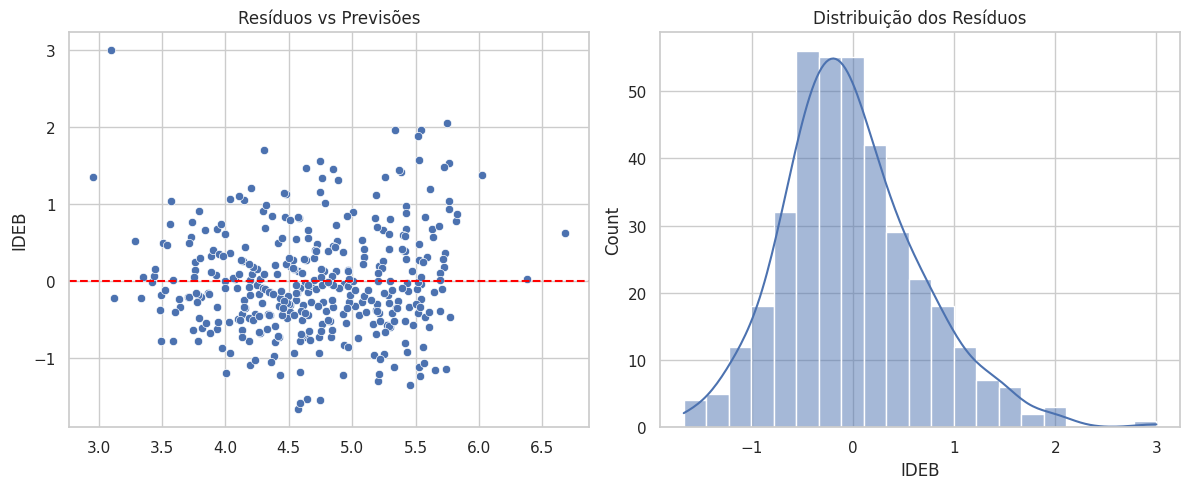

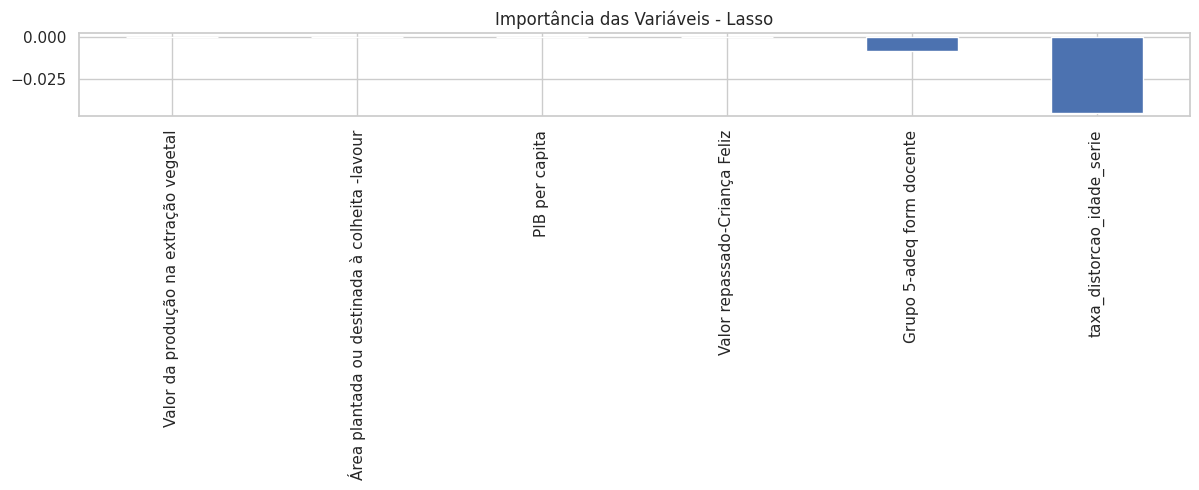


📊 Tabela de Importância das Variáveis - Lasso:



,Variável,Importância
0,Valor da produção na extração vegetal,0.0000
1,Área plantada ou destinada à colheita -lavour,0.0000
2,PIB per capita,0.0000
3,Valor repassado-Criança Feliz,0.0000
4,Grupo 5-adeq form docente,-0.0085
5,taxa_distorcao_idade_serie,-0.0444



🏁 Ridge

🔍 Ridge - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4968
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5037

📘 Ridge - Validação Cruzada (5-fold)
R² Médio: 0.5227 ± 0.0351
MAE Médio: 0.5014 ± 0.0180
RMSE Médio: 0.6430 ± 0.0261


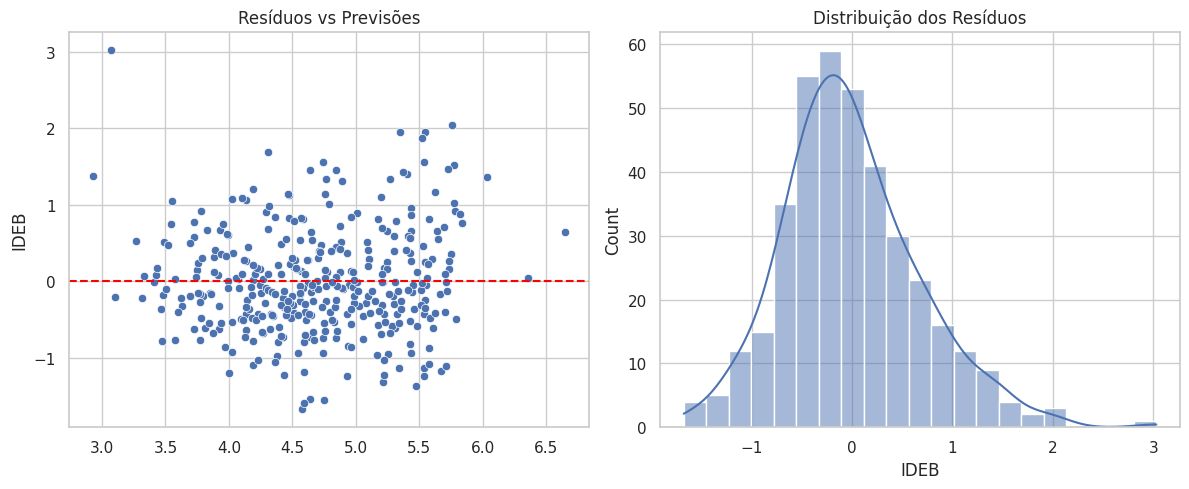

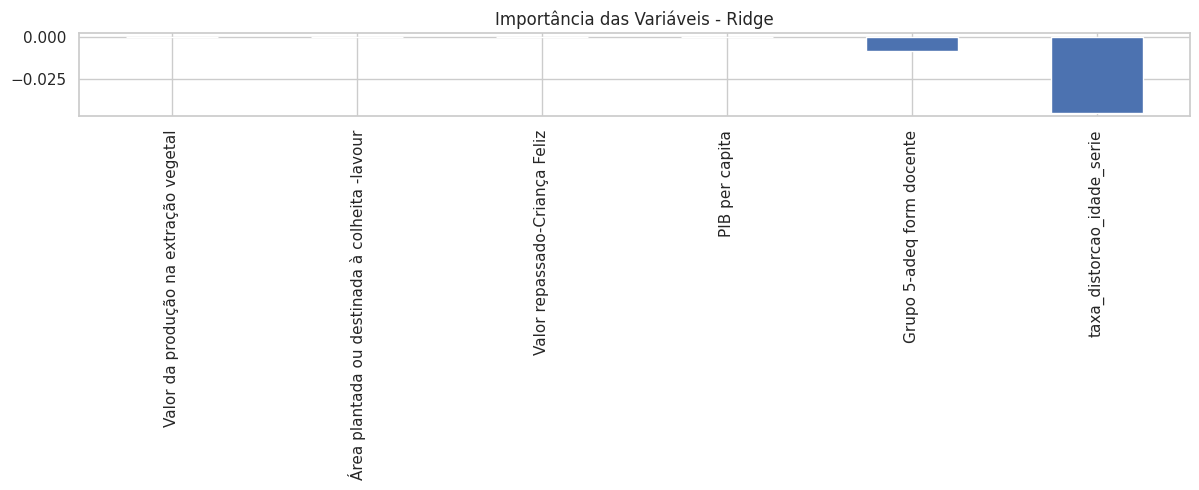


📊 Tabela de Importância das Variáveis - Ridge:



,Variável,Importância
0,Valor da produção na extração vegetal,0.0000
1,Área plantada ou destinada à colheita -lavour,0.0000
2,Valor repassado-Criança Feliz,0.0000
3,PIB per capita,0.0000
4,Grupo 5-adeq form docente,-0.0085
5,taxa_distorcao_idade_serie,-0.0453



🏁 Elastic Net

🔍 Elastic Net - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.6368
 - MAE: 0.4967
 - R² : 0.5336
📊 Teste:
 - RMSE: 0.6785
 - MAE: 0.5240
 - R² : 0.5038

📘 Elastic Net - Validação Cruzada (5-fold)
R² Médio: 0.5224 ± 0.0352
MAE Médio: 0.5014 ± 0.0179
RMSE Médio: 0.6432 ± 0.0264


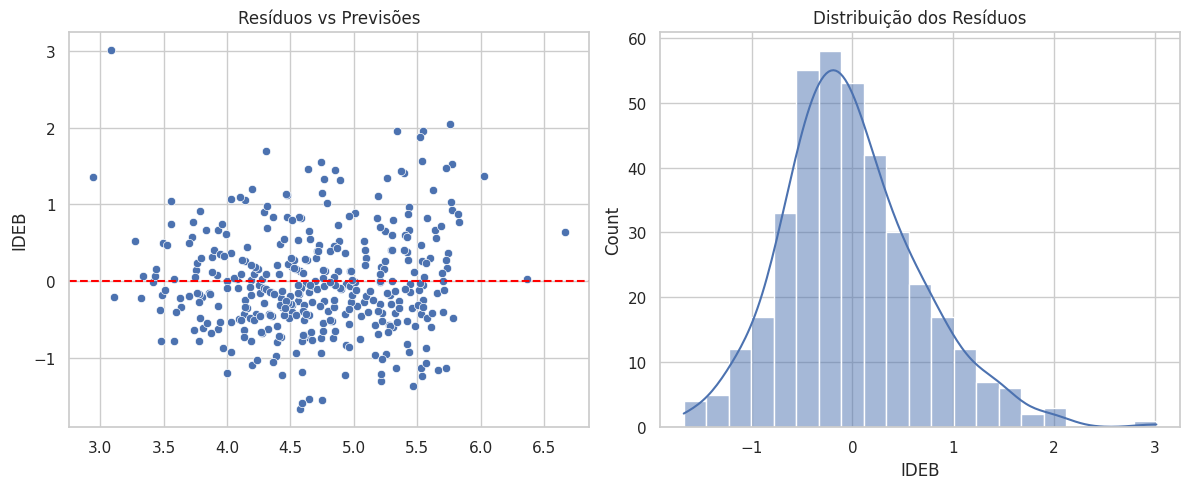

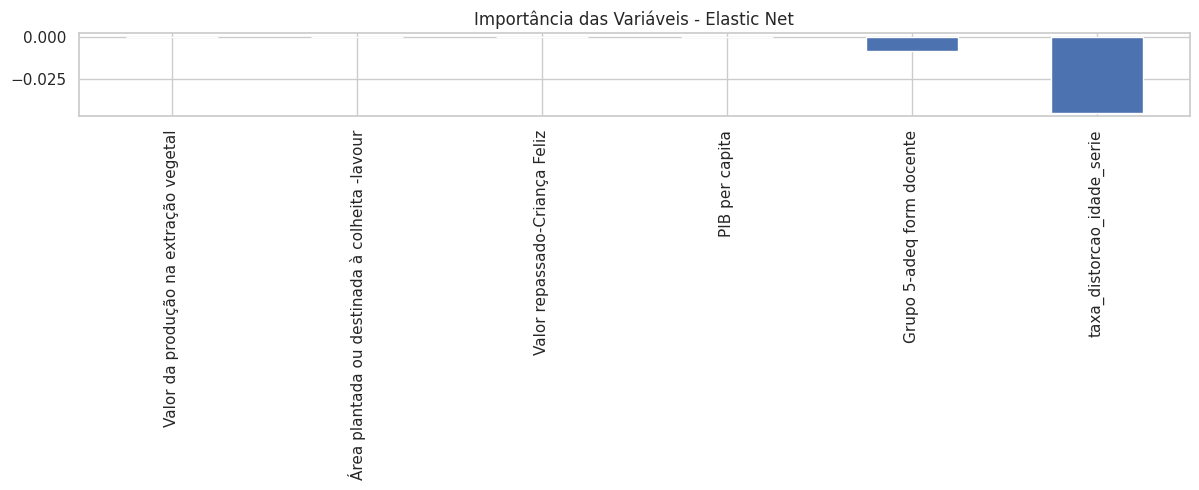


📊 Tabela de Importância das Variáveis - Elastic Net:



,Variável,Importância
0,Valor da produção na extração vegetal,0.0000
1,Área plantada ou destinada à colheita -lavour,0.0000
2,Valor repassado-Criança Feliz,0.0000
3,PIB per capita,0.0000
4,Grupo 5-adeq form docente,-0.0085
5,taxa_distorcao_idade_serie,-0.0448



🏁 KNN

🔍 KNN - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.7243
 - MAE: 0.5659
 - R² : 0.3966
📊 Teste:
 - RMSE: 0.8622
 - MAE: 0.6932
 - R² : 0.1987

📘 KNN - Validação Cruzada (5-fold)
R² Médio: 0.1745 ± 0.0530
MAE Médio: 0.6672 ± 0.0271
RMSE Médio: 0.8453 ± 0.0130


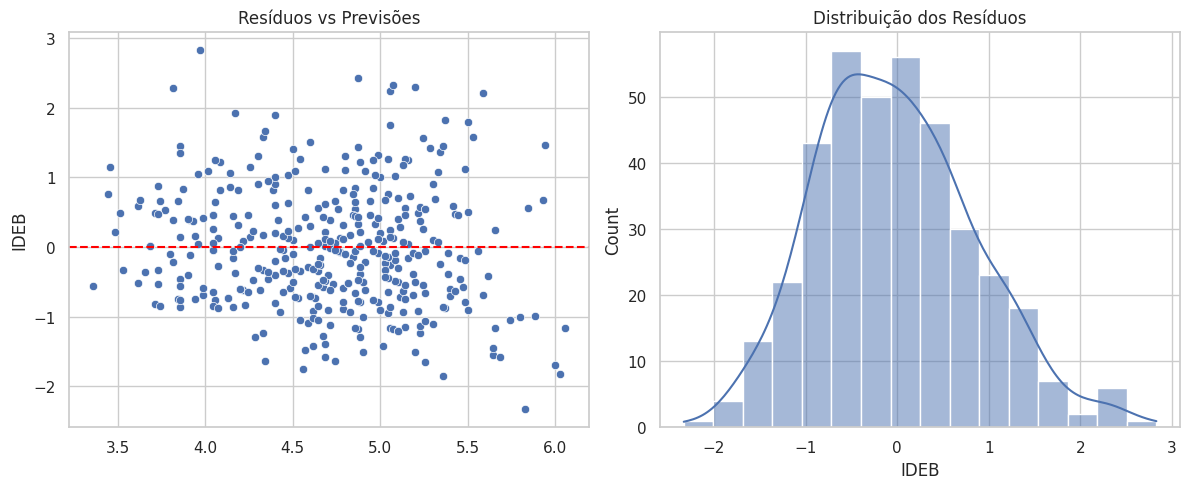

ℹ️ Modelo 'KNN' não possui coef_ nem feature_importances_. Utilizando Permutation Importance...


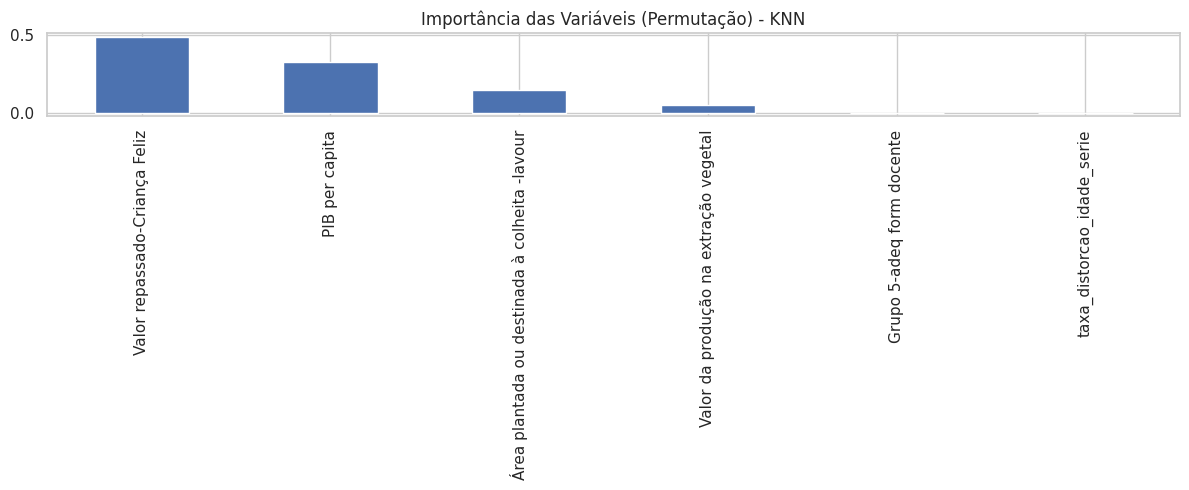


📊 Tabela de Importância das Variáveis (Permutação) - KNN:



,Variável,Importância (média)
0,Valor repassado-Criança Feliz,0.4918
1,PIB per capita,0.3249
2,Área plantada ou destinada à colheita -lavour,0.1461
3,Valor da produção na extração vegetal,0.0510
4,Grupo 5-adeq form docente,0.0001
5,taxa_distorcao_idade_serie,-0.0001



🏁 SVR

🔍 SVR - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.8132
 - MAE: 0.6325
 - R² : 0.2394
📊 Teste:
 - RMSE: 0.8631
 - MAE: 0.6842
 - R² : 0.1970

📘 SVR - Validação Cruzada (5-fold)
R² Médio: 0.2105 ± 0.0369
MAE Médio: 0.6495 ± 0.0110
RMSE Médio: 0.8272 ± 0.0215


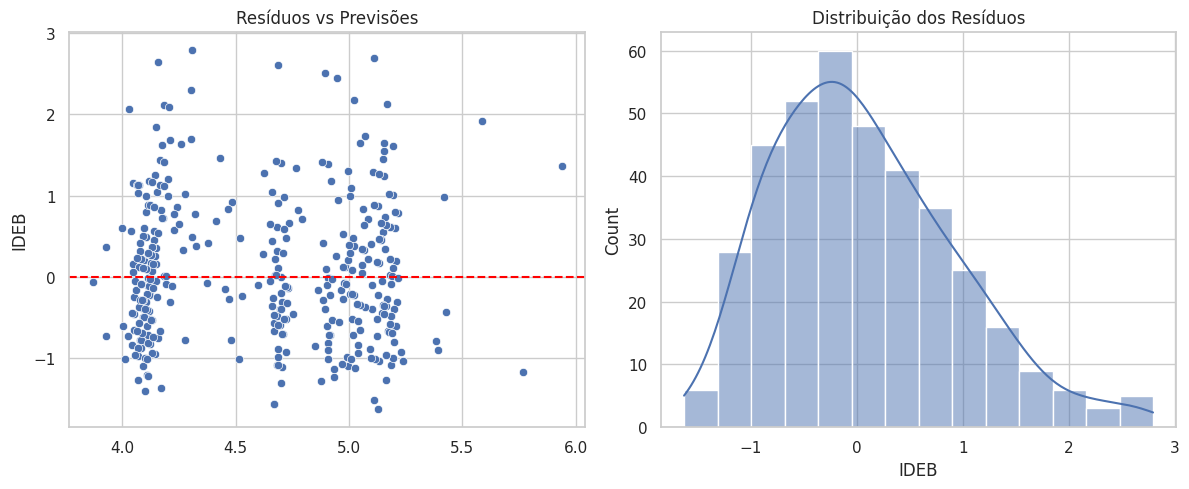

ℹ️ Modelo 'SVR' não possui coef_ nem feature_importances_. Utilizando Permutation Importance...


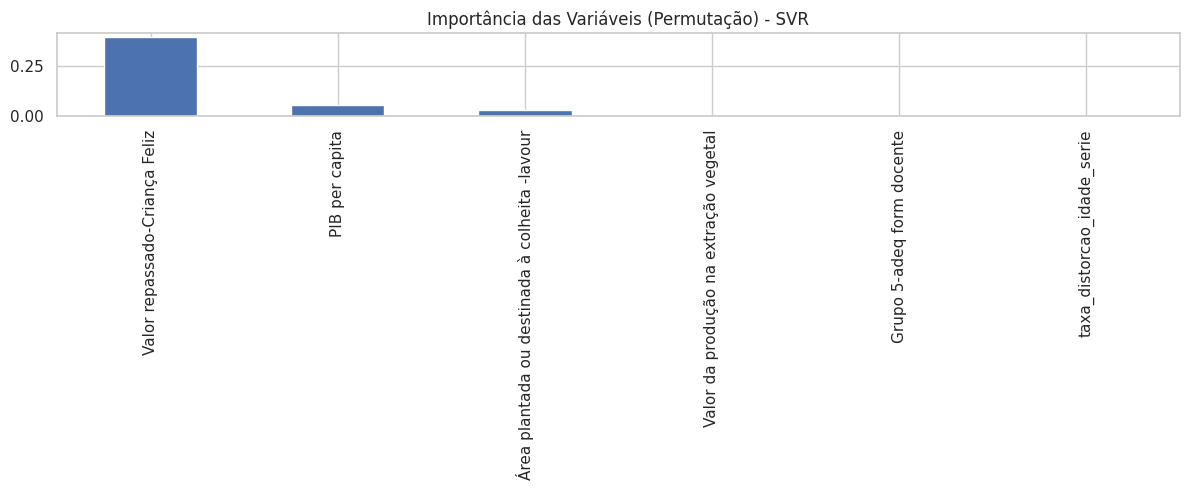


📊 Tabela de Importância das Variáveis (Permutação) - SVR:



,Variável,Importância (média)
0,Valor repassado-Criança Feliz,0.3954
1,PIB per capita,0.0558
2,Área plantada ou destinada à colheita -lavour,0.0319
3,Valor da produção na extração vegetal,0.0008
4,Grupo 5-adeq form docente,0.0000
5,taxa_distorcao_idade_serie,0.0000


In [14]:
# ========================================================
# CONFIGURAÇÃO DE AMBIENTE
# ========================================================
import tensorflow as tf
import random

SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)


from xgboost.callback import EarlyStopping

def verificar_linearidade(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valores Previstos')
    plt.ylabel('Valores Reais')
    plt.title('Linearidade entre Preditores e Resposta')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def verificar_independencia(y_test, y_pred):
    residuos = y_test - y_pred
    dw = durbin_watson(residuos)
    print(f"📏 Estatística de Durbin-Watson: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("✅ Os resíduos são provavelmente independentes.")
    else:
        print("⚠️ Há indícios de autocorrelação nos resíduos.")

def verificar_homocedasticidade(y_test, y_pred):
    residuos = y_test - y_pred
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuos)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Previsão')
    plt.ylabel('Resíduo')
    plt.title('Resíduos vs Previsões')
    plt.subplot(1, 2, 2)
    sns.histplot(residuos, kde=True, bins=30)
    plt.xlabel('Resíduo')
    plt.title('Distribuição dos Resíduos')
    plt.tight_layout()
    plt.show()

def verificar_normalidade(y_test, y_pred):
    residuos = y_test - y_pred
    stat, p = shapiro(residuos)
    print(f"📊 Teste de Shapiro-Wilk: estatística={stat:.4f}, p-valor={p:.4f}")
    if p > 0.05:
        print("✅ Os resíduos seguem uma distribuição normal.")
    else:
        print("⚠️ Os resíduos NÃO seguem uma distribuição normal.")

def verificar_multicolinearidade(X):
    vif_data = pd.DataFrame()
    vif_data["Variável"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    display(vif_data.sort_values(by="VIF", ascending=False))


# =======================
# Funções de Avaliação
# =======================
# =======================
# Função de Avaliação Completa (Treino e Teste)
# =======================
def avaliar_modelo(nome_modelo, modelo, X_train, y_train, X_test, y_test):
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas - Treinamento
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Métricas - Teste
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print(f"\n🔍 {nome_modelo} - Avaliação Completa")
    print("📊 Treinamento:")
    print(f" - RMSE: {rmse_train:.4f}")
    print(f" - MAE: {mae_train:.4f}")
    print(f" - R² : {r2_train:.4f}")

    print("📊 Teste:")
    print(f" - RMSE: {rmse_test:.4f}")
    print(f" - MAE: {mae_test:.4f}")
    print(f" - R² : {r2_test:.4f}")

    return modelo, y_pred_test

def validacao_cruzada(nome_modelo, modelo, X_train, y_train):
    scores_r2 = cross_val_score(modelo, X_train, y_train, cv=5, scoring='r2')
    scores_mae = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    scores_rmse = np.sqrt(-cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
    print(f"\n📘 {nome_modelo} - Validação Cruzada (5-fold)")
    print(f"R² Médio: {np.mean(scores_r2):.4f} ± {np.std(scores_r2):.4f}")
    print(f"MAE Médio: {abs(np.mean(scores_mae)):.4f} ± {np.std(scores_mae):.4f}")
    print(f"RMSE Médio: {np.mean(scores_rmse):.4f} ± {np.std(scores_rmse):.4f}")

# =======================
# Gráficos de Resíduos
# =======================
def graficos_residuos(y_test, y_pred):
    residuos = y_test - y_pred
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=y_pred, y=residuos, ax=ax[0])
    ax[0].axhline(0, linestyle='--', color='red')
    ax[0].set_title("Resíduos vs Previsões")
    sns.histplot(residuos, kde=True, ax=ax[1])
    ax[1].set_title("Distribuição dos Resíduos")
    plt.tight_layout()
    plt.show()

# =======================
# Verificação de Pressupostos (Regressão Linear)
# =======================
def verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred):
    print(f"\n🔎 Pressupostos - {nome_modelo}")
    verificar_linearidade(y_test, y_pred)
    verificar_independencia(y_test, y_pred)
    verificar_homocedasticidade(y_test, y_pred)
    verificar_normalidade(y_test, y_pred)
    verificar_multicolinearidade(X_train)



# =======================
# Importância das Variáveis
# =======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.inspection import permutation_importance

def importancia_variaveis(nome_modelo, modelo, X, y=None):
    """
    Exibe gráfico e tabela de importância das variáveis para diferentes tipos de modelos:
    - Modelos com coef_ (Regressões)
    - Modelos com feature_importances_ (Árvores, Random Forest, XGBoost)
    - Outros modelos como SVR e KNN (usa permutação se y for fornecido)

    Parâmetros:
    - nome_modelo: string com o nome do modelo
    - modelo: modelo treinado
    - X: DataFrame com variáveis preditoras
    - y: Series com a variável resposta (necessária apenas para modelos sem coef_ ou feature_importances_)
    """

    # Garante que todas as colunas e linhas possam ser exibidas na tabela
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # 1. Caso o modelo tenha coef_ (ex: Regressão Linear)
    if hasattr(modelo, "coef_"):
        # Cria uma série com os coeficientes associados às variáveis
        coef = pd.Series(modelo.coef_, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico de barras
        coef.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os coeficientes ordenados
        tabela = pd.DataFrame({'Variável': coef.index, 'Importância': coef.values})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        # Exibe tabela interativa no Jupyter/Colab
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 2. Caso o modelo tenha feature_importances_ (ex: Random Forest, XGBoost)
    elif hasattr(modelo, "feature_importances_"):
        # Obtém importâncias e ordena os índices em ordem decrescente
        importancias = modelo.feature_importances_
        indices = np.argsort(importancias)[::-1]

        # Plota o gráfico de barras
        plt.figure(figsize=(12, 5))
        plt.bar(range(X.shape[1]), importancias[indices])
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.title(f"Importância das Variáveis - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela ordenada com as variáveis e suas importâncias
        variaveis_ordenadas = X.columns[indices]
        importancias_ordenadas = importancias[indices]
        tabela = pd.DataFrame({'Variável': variaveis_ordenadas, 'Importância': importancias_ordenadas})
        print(f"\n📊 Tabela de Importância das Variáveis - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância': '{:.4f}'}))

    # 3. Para modelos sem atributos diretos de importância (ex: SVR, KNN)
    elif y is not None:
        print(f"ℹ️ Modelo '{nome_modelo}' não possui coef_ nem feature_importances_. Utilizando Permutation Importance...")

        # Calcula a importância por permutação (model-agnostic)
        resultado = permutation_importance(modelo, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importancias = pd.Series(resultado.importances_mean, index=X.columns).sort_values(ascending=False)

        # Plota o gráfico
        importancias.plot(kind='bar', figsize=(12, 5), title=f"Importância das Variáveis (Permutação) - {nome_modelo}")
        plt.tight_layout()
        plt.show()

        # Cria a tabela com os resultados
        tabela = pd.DataFrame({
            'Variável': importancias.index,
            'Importância (média)': importancias.values
        })
        print(f"\n📊 Tabela de Importância das Variáveis (Permutação) - {nome_modelo}:\n")
        display(tabela.style.set_table_attributes("style='display:inline'").format({'Importância (média)': '{:.4f}'}))

    # 4. Caso não seja possível calcular a importância
    else:
        print(f"⚠️ O modelo '{nome_modelo}' não possui métodos para calcular importância e a variável y não foi fornecida.")

# =======================
# Execução de Todos os Modelos
# =======================
# =======================
# Execução de Todos os Modelos com Ajustes Anti-Overfitting
# =======================
def executar_modelos_completos(X, y):

    modelos = [
        ("Lasso", Lasso(alpha=0.1)),
        ("Ridge", Ridge(alpha=1.0)),
        ("Elastic Net", ElasticNet(alpha=0.1, l1_ratio=0.5)),
        ("KNN", KNeighborsRegressor(n_neighbors=7)),
        ("SVR", SVR(kernel='rbf', C=1.0, epsilon=0.1))
    ]

    for nome_modelo, modelo in modelos:
        print("\n" + "="*60)
        print(f"🏁 {nome_modelo}")
        print("="*60)

        # Treinamento
        if nome_modelo == "XGBoost":
            modelo.fit(
                X_train, y_train,
               # eval_set=[(X_test, y_test)],
               # callbacks=[EarlyStopping(rounds=50)]
            )
        else:
            modelo.fit(X_train, y_train)
        #Previsão
        y_pred = modelo.predict(X_test)

        # Avaliação
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n🔍 {nome_modelo} - Avaliação Completa")
        print("📊 Treinamento:")
        y_pred_train = modelo.predict(X_train)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        print(f" - RMSE: {rmse_train:.4f}")
        print(f" - MAE: {mae_train:.4f}")
        print(f" - R² : {r2_train:.4f}")

        print("📊 Teste:")
        print(f" - RMSE: {rmse:.4f}")
        print(f" - MAE: {mae:.4f}")
        print(f" - R² : {r2:.4f}")

        # Validação cruzada
        validacao_cruzada(nome_modelo, modelo, X_train, y_train)

        # Gráficos de resíduos
        graficos_residuos(y_test, y_pred)

        # Verificação dos pressupostos da regressão linear
        if nome_modelo.lower() == "regressão linear":
            verificar_pressupostos(nome_modelo, X_train, y_train, modelo, y_test, y_pred)

        # Importância das variáveis
        importancia_variaveis(nome_modelo, modelo, X_train, y_train)





executar_modelos_completos(X, y)



# **MODELOS DL- (Modelos com apenas as melhores variáveis da por meio do pipeline das 4 técnicas de seleção de variávies)**

### **Bibliotecas divisão da base de dados**

In [15]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler


melhores_variaveis = [
    'PIB per capita',
    'taxa_distorcao_idade_serie',
    'Grupo 5-adeq form docente',
    'Área plantada ou destinada à colheita -lavour',
    'Valor da produção na extração vegetal',
    'Valor repassado-Criança Feliz'
    ]


# ======================
# PRÉ-PROCESSAMENTO
# ======================

# ----------------------
# 1. Definição da variável alvo
# ----------------------
y = df["IDEB"]

# ----------------------
# 2. Seleção das melhores variáveis preditoras
# ----------------------
X = df[melhores_variaveis].copy()

# 3. Normalização com StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Funções dos modelos**

In [16]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten, LSTM

def construir_modelo_mlp(input_dim):
    modelo = Sequential()
    modelo.add(Dense(64, activation='relu', input_dim=input_dim))
    modelo.add(Dense(32, activation='relu'))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

def construir_modelo_mlp_dropout(input_dim):
    modelo = Sequential()
    modelo.add(Dense(128, activation='relu', input_dim=input_dim))
    modelo.add(Dropout(0.3))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dropout(0.3))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

def construir_modelo_mlp_batchnorm(input_dim):
    modelo = Sequential()
    modelo.add(Dense(128, activation='relu', input_dim=input_dim))
    modelo.add(BatchNormalization())
    modelo.add(Dense(64, activation='relu'))
    modelo.add(BatchNormalization())
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

# Exemplo de MLP mais profunda
def construir_modelo_deep_mlp(input_dim):
    modelo = Sequential()
    modelo.add(Dense(256, activation='relu', input_dim=input_dim))
    modelo.add(Dropout(0.4))
    modelo.add(Dense(128, activation='relu'))
    modelo.add(Dropout(0.3))
    modelo.add(Dense(64, activation='relu'))
    modelo.add(Dense(32, activation='relu'))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])
    return modelo


def construir_modelo_cnn(input_shape):
    modelo = Sequential()
    modelo.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=input_shape))
    modelo.add(MaxPooling1D(pool_size=2))
    modelo.add(Flatten())
    modelo.add(Dense(50, activation='relu'))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

def construir_modelo_lstm(input_shape):
    modelo = Sequential()
    modelo.add(LSTM(units=50, activation='tanh', input_shape=input_shape))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

def construir_modelo_cnn_lstm(input_shape):
    modelo = Sequential()
    modelo.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=input_shape))
    modelo.add(MaxPooling1D(pool_size=2))
    modelo.add(LSTM(units=50, activation='tanh'))
    modelo.add(Dense(1, activation='linear'))
    modelo.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return modelo

### **Modelo MLP**

In [17]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import os
import random
import numpy as np
import tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS) NO TREINO (70%)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_mlp(X.shape[1])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada no Treino 70%):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_mlp(X.shape[1])
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (70%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.4670 | MSE: 0.3747 | RMSE: 0.6122 | R²: 0.4577

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.5023 | MSE: 0.3977 | RMSE: 0.6307 | R²: 0.5601

Fold 3


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.5276 | MSE: 0.4694 | RMSE: 0.6851 | R²: 0.4710

Fold 4


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
MAE: 0.4966 | MSE: 0.4016 | RMSE: 0.6337 | R²: 0.5416

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.5010 | MSE: 0.4161 | RMSE: 0.6451 | R²: 0.5719

MÉDIAS E DESVIOS (Validação Cruzada no Treino 70%):
MAE:  0.4989 ± 0.0193
MSE:  0.4119 ± 0.0316
RMSE: 0.6413 ± 0.0243
R²:   0.5205 ± 0.0470
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

DESEMPENHO NO TREINAMENTO FINAL (70%):
MAE:  0.4582 | MSE:  0.3445 | RMSE: 0.5869 | R²: 0.6038
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5246 | MSE:  0.4390 | RMSE: 0.6626 | R²: 0.5268


### **Modelo MLP - com explicabilidade**


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.4670 | MSE: 0.3747 | RMSE: 0.6122 | R²: 0.4577

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.5023 | MSE: 0.3977 | RMSE: 0.6307 | R²: 0.5601

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 0.5276 | MSE: 0.4694 | RMSE: 0.6851 | R²: 0.4710

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
MAE: 0.4966 | MSE: 0.4016 | RMSE: 0.6337 | R²: 0.5416

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.5010 | MSE: 0.4161 | RMSE: 0.6451 | R²: 0.5719

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.4989 ± 0.0193
MSE:  0.4119 ± 0.0316
RMSE: 0.6413 ± 0.0243
R²:   0.5205 ± 0.0470
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

DESEMPENHO NO TREINAMENTO FINAL (70%):
MAE:  0.4582 | MSE:  0.3445 | RMSE: 0.5869 | R²: 0.6038
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5246 | MSE:  0.4390 | RMSE: 0.6626 | R²: 0.5268

IMPORTÂNCIA DAS VARIÁVEIS (PERMUTATION):
                                        variavel  importancia_perm

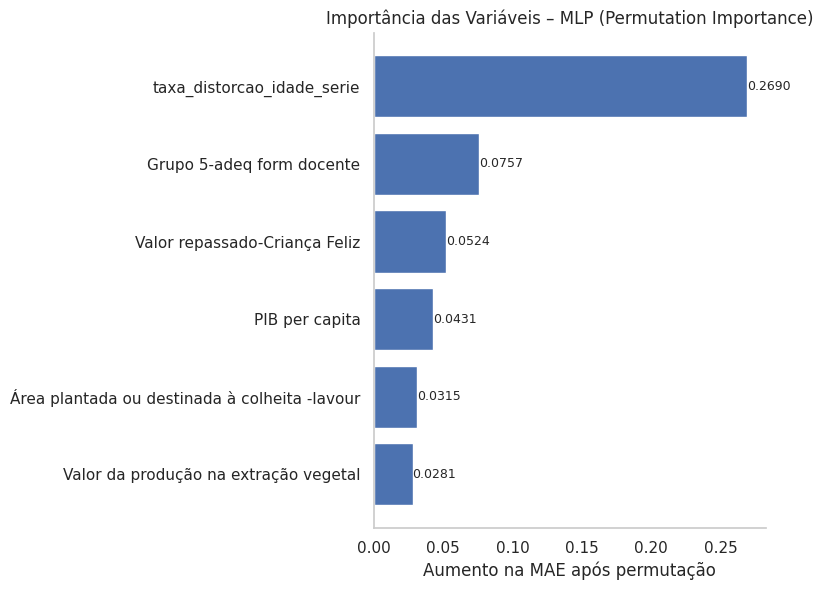

In [18]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from copy import deepcopy

# ======================================
# CONFIGURAÇÕES DE REPRODUTIBILIDADE
# ======================================
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ======================================
# FUNÇÃO PARA CONSTRUIR A MLP
# ======================================
def construir_modelo_mlp(n_inputs):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(n_inputs,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model


# ===============================
# SALVA OS NOMES DAS VARIÁVEIS
# ===============================
nomes_colunas = melhores_variaveis

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


y_trainval = y_trainval.values

# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_mlp(X.shape[1])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_mlp(X.shape[1])
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (70%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (20%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


# ======================================================
# IMPORTÂNCIA DAS VARIÁVEIS (PERMUTATION IMPORTANCE)
# ======================================================
def importancia_permutacao(modelo, X, y, metric=mean_absolute_error, n_repeats=10):
    """
    Calcula a importância das variáveis via permutação.
    """
    y_pred_original = modelo.predict(X, verbose=0).flatten()
    baseline = metric(y, y_pred_original)
    importancias = []

    for col in range(X.shape[1]):
        perdas = []
        for _ in range(n_repeats):
            X_perm = deepcopy(X)
            np.random.shuffle(X_perm[:, col])
            y_pred_perm = modelo.predict(X_perm, verbose=0).flatten()
            perda = metric(y, y_pred_perm)
            perdas.append(perda - baseline)

        importancias.append(np.mean(perdas))

    return np.array(importancias)

# Executando a importância por permutação
importancias = importancia_permutacao(modelo_final, X_trainval, y_trainval)

df_importancia = pd.DataFrame({
    "variavel": nomes_colunas,
    "importancia_permutacao": importancias
}).sort_values(by="importancia_permutacao", ascending=False)

print("\nIMPORTÂNCIA DAS VARIÁVEIS (PERMUTATION):")
print(df_importancia)

# ======================================================
# GRÁFICO DA IMPORTÂNCIA DAS VARIÁVEIS
# ======================================================

plt.figure(figsize=(8, 6))

# Plot do gráfico
bars = plt.barh(df_importancia["variavel"], df_importancia["importancia_permutacao"])

# Inverter eixo Y (importâncias em ordem decrescente)
plt.gca().invert_yaxis()

# Remover completamente a grade
plt.grid(False)

# Garantir que apenas os eixos X e Y apareçam
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Deixa apenas left e bottom (eixos Y e X)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Adicionar rótulos numéricos
for bar in bars:
    valor = bar.get_width()
    plt.text(
        valor,
        bar.get_y() + bar.get_height() / 2,
        f"{valor:.4f}",
        va="center",
        ha="left",
        fontsize=9
    )

plt.xlabel("Aumento na MAE após permutação")
plt.title("Importância das Variáveis – MLP (Permutation Importance)")
plt.tight_layout()
plt.show()



### **MLP com Dropout**

In [19]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_mlp_dropout(X.shape[1])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_mlp_dropout(X.shape[1])
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (80%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
MAE: 0.5171 | MSE: 0.4547 | RMSE: 0.6743 | R²: 0.3420

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
MAE: 0.5256 | MSE: 0.4456 | RMSE: 0.6676 | R²: 0.5071

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE: 0.5363 | MSE: 0.4803 | RMSE: 0.6930 | R²: 0.4587

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE: 0.5137 | MSE: 0.4347 | RMSE: 0.6593 | R²: 0.5038

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
MAE: 0.5471 | MSE: 0.5119 | RMSE: 0.7155 | R²: 0.4734

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.5280 ± 0.0124
MSE:  0.4654 ± 0.0277
RMSE: 0.6819 ± 0.0201
R²:   0.4570 ± 0.0603
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

DESEMPENHO NO TREINAMENTO FINAL (80%):
MAE:  0.4896 | MSE:  0.4078 | RMSE: 0.6386 | R²: 0.5310
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5270 | MSE:  0.4703 | RMSE: 0.6858 | R²: 0.4930


### **MLP com BatchNorm**

In [20]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_mlp_batchnorm(X.shape[1])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_mlp_batchnorm(X.shape[1])
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (80%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
MAE: 0.6215 | MSE: 0.7462 | RMSE: 0.8638 | R²: -0.0799

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 0.5579 | MSE: 0.4967 | RMSE: 0.7048 | R²: 0.4506

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MAE: 0.6901 | MSE: 0.9602 | RMSE: 0.9799 | R²: -0.0821

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
MAE: 0.6471 | MSE: 0.7352 | RMSE: 0.8574 | R²: 0.1608

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MAE: 0.6450 | MSE: 0.7615 | RMSE: 0.8727 | R²: 0.2166

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.6323 ± 0.0433
MSE:  0.7400 ± 0.1471
RMSE: 0.8557 ± 0.0878
R²:   0.1332 ± 0.2001
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

DESEMPENHO NO TREINAMENTO FINAL (80%):
MAE:  0.4745 | MSE:  0.4056 | RMSE: 0.6369 | R²: 0.5335
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5784 | MSE:  0.5794 | RMSE: 0.7612 | R²: 0.3755


### **Deep MLP**

In [21]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)


# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_deep_mlp(X.shape[1])
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_deep_mlp(X.shape[1])
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (70%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 0.5601 | MSE: 0.5473 | RMSE: 0.7398 | R²: 0.2080

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE: 0.5196 | MSE: 0.5029 | RMSE: 0.7091 | R²: 0.4438

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
MAE: 0.5471 | MSE: 0.5027 | RMSE: 0.7090 | R²: 0.4335

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE: 0.5331 | MSE: 0.4783 | RMSE: 0.6916 | R²: 0.4540

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
MAE: 0.5885 | MSE: 0.5521 | RMSE: 0.7430 | R²: 0.4321

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.5497 ± 0.0237
MSE:  0.5166 ± 0.0285
RMSE: 0.7185 ± 0.0198
R²:   0.3943 ± 0.0935
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

DESEMPENHO NO TREINAMENTO FINAL (70%):
MAE:  0.5151 | MSE:  0.4580 | RMSE: 0.6768 | R²: 0.4732
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5603 | MSE:  0.5724 | RMSE: 0.7566 | R²: 0.3829


### **CNN 1D**

In [22]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)


# ===============================
# PRÉ-PROCESSAMENTO (reshape para CNN)
# ===============================
X = X.reshape((X.shape[0], X.shape[1], 1))  # (amostras, timesteps, features)

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

y_trainval = y_trainval.values

# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")

    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_cnn((X.shape[1], 1))  # input_shape = (6,1)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_cnn((X.shape[1], 1))
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (70%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 0.4640 | MSE: 0.3586 | RMSE: 0.5989 | R²: 0.4810

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 0.5040 | MSE: 0.4040 | RMSE: 0.6356 | R²: 0.5531

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 0.5482 | MSE: 0.4850 | RMSE: 0.6964 | R²: 0.4534

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
MAE: 0.5131 | MSE: 0.4265 | RMSE: 0.6531 | R²: 0.5132

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
MAE: 0.5279 | MSE: 0.4625 | RMSE: 0.6801 | R²: 0.5242

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.5114 ± 0.0280
MSE:  0.4273 ± 0.0443
RMSE: 0.6528 ± 0.0342
R²:   0.5050 ± 0.0346
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

DESEMPENHO NO TREINAMENTO FINAL (70%):
MAE:  0.4985 | MSE:  0.4012 | RMSE: 0.6334 | R²: 0.5386
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5474 | MSE:  0.4695 | RMSE: 0.6852 | R²: 0.4939


### **LSTM**

In [23]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)

# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_lstm((X.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_lstm((X.shape[1], 1))
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (80%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 0.5086 | MSE: 0.4250 | RMSE: 0.6519 | R²: 0.3849

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
MAE: 0.5485 | MSE: 0.4516 | RMSE: 0.6720 | R²: 0.5005

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
MAE: 0.5309 | MSE: 0.4515 | RMSE: 0.6719 | R²: 0.4912

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
MAE: 0.5717 | MSE: 0.5125 | RMSE: 0.7159 | R²: 0.4150

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE: 0.5426 | MSE: 0.4987 | RMSE: 0.7062 | R²: 0.4869

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.5405 ± 0.0207
MSE:  0.4679 ± 0.0326
RMSE: 0.6836 ± 0.0238
R²:   0.4557 ± 0.0467
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

DESEMPENHO NO TREINAMENTO FINAL (80%):
MAE:  0.5157 | MSE:  0.4216 | RMSE: 0.6493 | R²: 0.5151
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5434 | MSE:  0.4622 | RMSE: 0.6799 | R²: 0.5018


## **CNN + LSTM**

In [24]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


import os
import random
import numpy as np
import tensorflow as tf

SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# TensorFlow
tf.random.set_seed(SEED)

# Para garantir máxima reprodutibilidade (relevante apenas em ambientes específicos)
os.environ['PYTHONHASHSEED'] = str(SEED)


# ===============================
# DIVISÃO TREINO/TESTE (70/30)
# ===============================
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#X_trainval = X_trainval.values
y_trainval = y_trainval.values


# ===============================
# VALIDAÇÃO CRUZADA (5 FOLDS)
# ===============================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_list, mse_list, rmse_list, r2_list = [], [], [], []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_trainval)):
    print(f"\nFold {fold+1}")
    X_train, X_val = X_trainval[train_idx], X_trainval[val_idx]
    y_train, y_val = y_trainval[train_idx], y_trainval[val_idx]

    model = construir_modelo_cnn_lstm((X.shape[1], 1))
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    y_pred_val = model.predict(X_val).flatten()

    mae = mean_absolute_error(y_val, y_pred_val)
    mse = mean_squared_error(y_val, y_pred_val)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, y_pred_val)

    print(f"MAE: {mae:.4f} | MSE: {mse:.4f} | RMSE: {rmse:.4f} | R²: {r2:.4f}")

    mae_list.append(mae)
    mse_list.append(mse)
    rmse_list.append(rmse)
    r2_list.append(r2)

# ===============================
# RESULTADOS DA VALIDAÇÃO CRUZADA
# ===============================
print("\nMÉDIAS E DESVIOS (Validação Cruzada):")
print(f"MAE:  {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"MSE:  {np.mean(mse_list):.4f} ± {np.std(mse_list):.4f}")
print(f"RMSE: {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²:   {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TREINO (70%)
# ===============================
modelo_final = construir_modelo_cnn_lstm((X.shape[1], 1))
modelo_final.fit(X_trainval, y_trainval, epochs=50, batch_size=32, verbose=0)

y_pred_train = modelo_final.predict(X_trainval).flatten()
mae_train = mean_absolute_error(y_trainval, y_pred_train)
mse_train = mean_squared_error(y_trainval, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_trainval, y_pred_train)

print("\nDESEMPENHO NO TREINAMENTO FINAL (80%):")
print(f"MAE:  {mae_train:.4f} | MSE:  {mse_train:.4f} | RMSE: {rmse_train:.4f} | R²: {r2_train:.4f}")

# ===============================
# AVALIAÇÃO FINAL NO TESTE (30%)
# ===============================
y_pred_test = modelo_final.predict(X_test).flatten()
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nDESEMPENHO NO TESTE FINAL (30%):")
print(f"MAE:  {mae_test:.4f} | MSE:  {mse_test:.4f} | RMSE: {rmse_test:.4f} | R²: {r2_test:.4f}")


Fold 1
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
MAE: 0.4606 | MSE: 0.3551 | RMSE: 0.5959 | R²: 0.4862

Fold 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
MAE: 0.5102 | MSE: 0.4060 | RMSE: 0.6372 | R²: 0.5509

Fold 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 0.5357 | MSE: 0.4677 | RMSE: 0.6839 | R²: 0.4729

Fold 4
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 0.5309 | MSE: 0.4522 | RMSE: 0.6724 | R²: 0.4839

Fold 5
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
MAE: 0.5063 | MSE: 0.4281 | RMSE: 0.6543 | R²: 0.5596

MÉDIAS E DESVIOS (Validação Cruzada):
MAE:  0.5087 ± 0.0266
MSE:  0.4218 ± 0.0394
RMSE: 0.6487 ± 0.0308
R²:   0.5107 ± 0.0368
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

DESEMPENHO NO TREINAMENTO FINAL (80%):
MAE:  0.4953 | MSE:  0.3964 | RMSE: 0.6296 | R²: 0.5441
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

DESEMPENHO NO TESTE FINAL (30%):
MAE:  0.5441 | MSE:  0.4605 | RMSE: 0.6786 | R²: 0.5036


# **TESTES ESTATÍSTICOS - COMPARAÇÃO XGBOOST E MLP**

### **Valores dos folds**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

melhores_variaveis = [
 'PIB per capita',
  'taxa_distorcao_idade_serie',
  'Grupo 5-adeq form docente',
  'Área plantada ou destinada à colheita -lavour',
  'Valor da produção na extração vegetal',
  'Valor repassado-Criança Feliz'
]


# ======================
# Pré-processamento
# ======================

# Variável alvo
y = df["IDEB"]

X = df[melhores_variaveis].copy()

# Divisão treino/teste - 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
# ========================================================
# CONFIGURAÇÃO DE AMBIENTE
# ========================================================
import random
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold


SEED = 42
np.random.seed(SEED)
random.seed(SEED)


# ========================================================
# FUNÇÕES
# ========================================================
def validacao_cruzada_xgb(modelo, X_train, y_train, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=SEED)

    r2_folds = []
    mae_folds = []
    rmse_folds = []

    print(f"\n📘 XGBoost - Validação Cruzada ({cv}-fold)")
    print("-" * 50)

    fold = 1
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        modelo_fold = XGBRegressor(
            n_estimators=1000,
            learning_rate=0.01,
            max_depth=2,
            subsample=0.8,
            colsample_bytree=0.8,
            reg_alpha=1.0,
            reg_lambda=10.0,
            n_jobs=-1,
            random_state=SEED
        )

        modelo_fold.fit(X_tr, y_tr)
        y_val_pred = modelo_fold.predict(X_val)

        rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
        mae = mean_absolute_error(y_val, y_val_pred)
        r2 = r2_score(y_val, y_val_pred)

        rmse_folds.append(rmse)
        mae_folds.append(mae)
        r2_folds.append(r2)

        print(f"Fold {fold}: RMSE = {rmse:.4f} | MAE = {mae:.4f} | R² = {r2:.4f}")
        fold += 1

    print("-" * 50)
    print(f"R² Médio: {np.mean(r2_folds):.4f} ± {np.std(r2_folds):.4f}")
    print(f"MAE Médio: {np.mean(mae_folds):.4f} ± {np.std(mae_folds):.4f}")
    print(f"RMSE Médio: {np.mean(rmse_folds):.4f} ± {np.std(rmse_folds):.4f}")


def executar_xgboost(X_train, y_train, X_test, y_test):
    modelo = XGBRegressor(
        n_estimators=1000,
        learning_rate=0.01,
        max_depth=2,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=1.0,
        reg_lambda=10.0,
        n_jobs=-1,
        random_state=SEED
    )

    # Treinamento
    modelo.fit(X_train, y_train)

    # Previsões
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)

    # Métricas - Treino
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    # Métricas - Teste
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    print("\n" + "="*60)
    print("🏁 XGBoost")
    print("="*60)

    print("\n🔍 XGBoost - Avaliação Completa")
    print("📊 Treinamento:")
    print(f" - RMSE: {rmse_train:.4f}")
    print(f" - MAE: {mae_train:.4f}")
    print(f" - R² : {r2_train:.4f}")

    print("📊 Teste:")
    print(f" - RMSE: {rmse_test:.4f}")
    print(f" - MAE: {mae_test:.4f}")
    print(f" - R² : {r2_test:.4f}")

    # Validação cruzada
    validacao_cruzada_xgb(modelo, X_train, y_train, cv=5)



    return modelo, y_pred_test


modelo_xgb, y_pred_test = executar_xgboost(X_train, y_train, X_test, y_test)


🏁 XGBoost

🔍 XGBoost - Avaliação Completa
📊 Treinamento:
 - RMSE: 0.5606
 - MAE: 0.4354
 - R² : 0.6385
📊 Teste:
 - RMSE: 0.6431
 - MAE: 0.5050
 - R² : 0.5542

📘 XGBoost - Validação Cruzada (5-fold)
--------------------------------------------------
Fold 1: RMSE = 0.5925 | MAE = 0.4466 | R² = 0.4920
Fold 2: RMSE = 0.6055 | MAE = 0.4807 | R² = 0.5945
Fold 3: RMSE = 0.6575 | MAE = 0.5083 | R² = 0.5128
Fold 4: RMSE = 0.6352 | MAE = 0.4974 | R² = 0.5394
Fold 5: RMSE = 0.6321 | MAE = 0.4873 | R² = 0.5890
--------------------------------------------------
R² Médio: 0.5455 ± 0.0407
MAE Médio: 0.4841 ± 0.0209
RMSE Médio: 0.6246 ± 0.0230


### **Aplicar Teste de Wilcoxon Pareado**

**R² folds XGBoost:** [0.4920, 0.5945, 0.5128, 0.5394, 0.5890]

**R² folds MLP :** [0.4577, 0.5601, 0.4710, 0.5416, 0.5719]

In [27]:
from scipy.stats import wilcoxon
r2_xgb =[0.4920, 0.5945, 0.5128, 0.5394, 0.5890]
r2_mlp = [0.4577, 0.5601, 0.4710, 0.5416, 0.5719]
stat, p_value = wilcoxon(r2_xgb, r2_mlp)

print("Estatística W:", stat)
print("p-valor:", p_value)

Estatística W: 1.0
p-valor: 0.125


INTERPRETAÇÃO

Se p < 0.05 → diferença estatisticamente significativa

Se p ≥ 0.05 → não há evidência estatística de superioridade